# **Binary Classification with Neural Networks – From Logistic Regression to Deep Learning**

In [ ]:
# ------------------------------------------
# 📦 Installation (Only for Google Colab)
# ------------------------------------------
!pip install -q pandas matplotlib seaborn scikit-learn tensorflow pydot

# Required for model visualization
!apt-get -qq install graphviz

# ------------------------------------------
# 🔧 Import Libraries
# ------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)

# TensorFlow for ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Plot settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)


# 🧠 Binary Classification for Business: From Logistic Regression to Deep Neural Networks

## 📊 Business Case: Credit Card Fraud Detection
Financial institutions need to identify **fraudulent credit card transactions** to prevent customers from being charged for unauthorized purchases. Using historical transaction data, our goal is to build a **predictive model** to estimate the **probability of fraud** for each transaction.

---
## 🧮 Problem Type: Binary Classification
We are solving a **supervised learning** problem with binary output:
$$
y_i \in \{0, 1\}, \quad \hat{y}_i \in (0, 1)
$$
Where:
- $y_i = 1$ indicates a **fraudulent transaction**
- $y_i = 0$ indicates a **legitimate transaction**

---
## 🧱 Modeling Strategy
We will build and compare the following models:

| Step | Model | Description |

|------|--------------------------|-------------|

| 1️⃣ | Logistic Regression | Linear baseline model |

| 2️⃣ | Basic Neural Network | One hidden layer (nonlinear modeling) |

| 3️⃣ | Deep Neural Network | Multiple layers, deeper representation |

---
## 🎯 Learning Objectives
By completing this notebook, you will:
✅ Understand how to formulate a binary classification task with extremely imbalanced data
✅ Learn how logistic regression compares to neural networks for fraud detection
✅ Implement and train models in `scikit-learn` and `TensorFlow/Keras`
✅ Evaluate models using precision, recall, F1, and Precision-Recall AUC
✅ Analyze model performance in a high-stakes business application

---
## 📦 Dataset
- **Source**: Credit Card Fraud Detection dataset
- **Target**: `Class` (1 = Fraud, 0 = Normal)
- **Features**: Time, Amount, and 28 anonymized features (V1-V28) from PCA transformation
- **Challenge**: Highly imbalanced (< 1% of transactions are fraudulent)

Let's begin by loading and exploring the dataset.

In [ ]:
# 📥 Download the Credit Card Fraud Detection dataset
!wget https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv -q

# 📥 Load the Credit Card Fraud dataset
df = pd.read_csv('creditcard.csv')

# 🧾 Inspect the first few rows
print("📌 First five rows of the dataset:")
display(df.head())

# 📏 Dataset shape
print(f"\n✅ Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# 📊 Data types
print("\n🔍 Data types of each column:")
print(df.dtypes)

# 🔎 Missing values
print("\n❗ Missing values per column:")
print(df.isnull().sum())

# 📊 Class distribution
print("\n📊 Class distribution (Fraud vs Normal):")
class_counts = df['Class'].value_counts()
print(class_counts)
print(f"Fraud percentage: {df['Class'].mean()*100:.4f}%")

# 🧠 Interpretation
print(
"""
🧠 Notes:
- The dataset contains credit card transactions with anonymized features.
- The target variable is 'Class', where 1 indicates fraudulent transactions and 0 indicates legitimate ones.
- Features V1-V28 are the result of a PCA transformation to protect user identities.
- 'Time' represents seconds elapsed between transactions.
- 'Amount' is the transaction amount.
- The dataset is highly imbalanced (< 1% fraudulent transactions).
- No missing values detected - ready for modeling.
"""
)

📌 First five rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



✅ Dataset contains 284807 rows and 31 columns.

🔍 Data types of each column:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

❗ Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26     

🧮 Class Distribution (Fraud vs Normal):


,count
Class,
0,284315
1,492


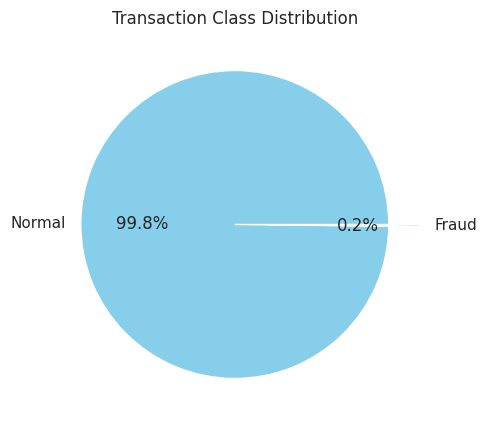

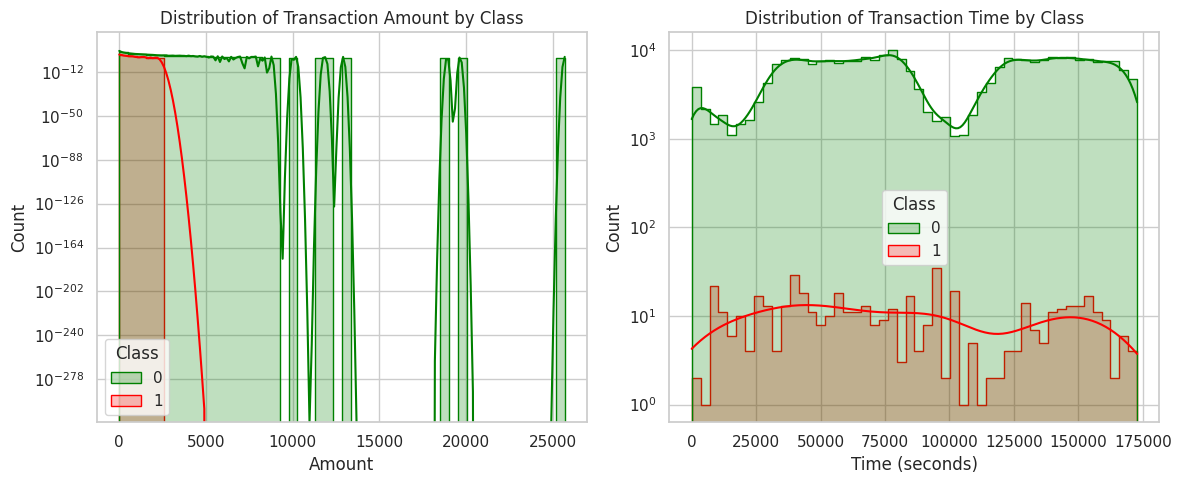

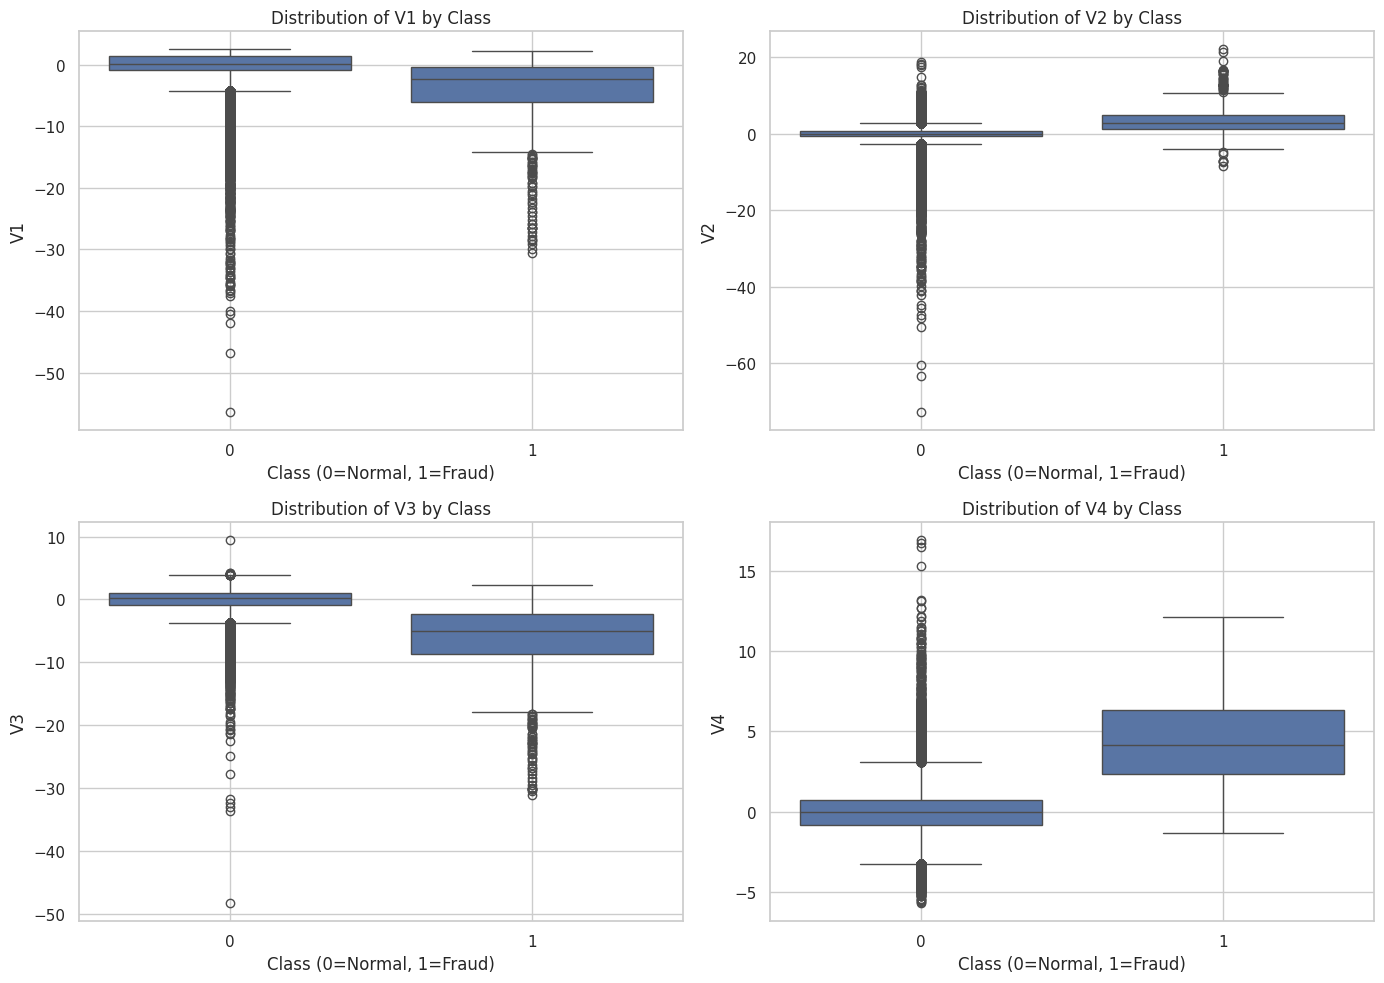

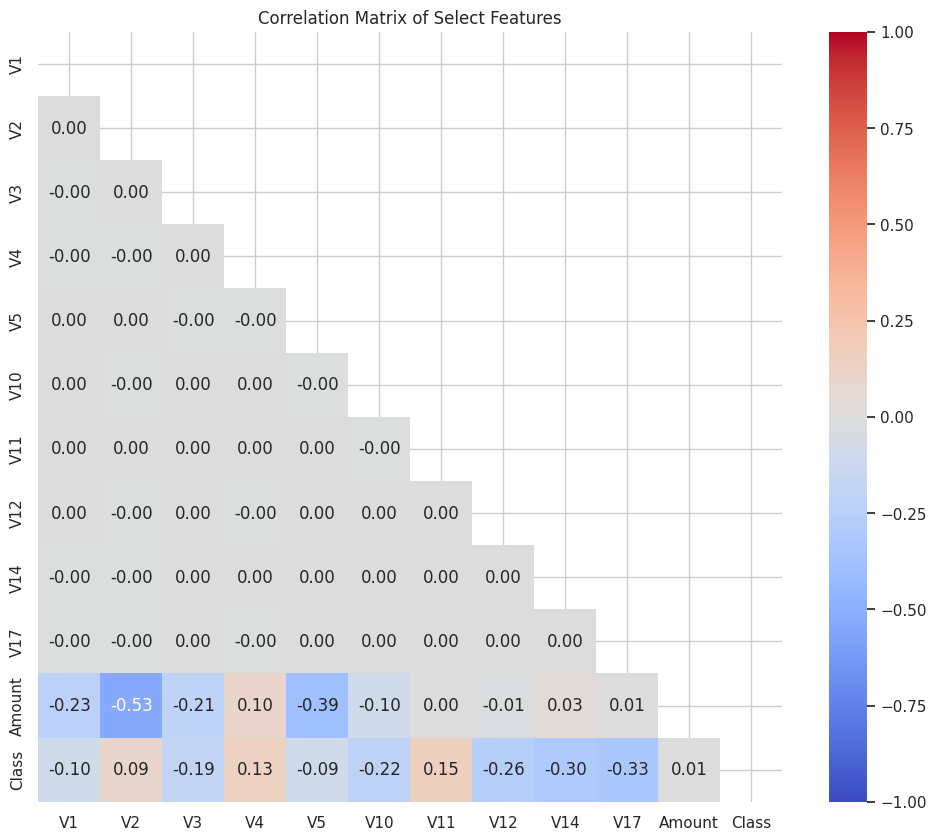

<ipython-input-4-cb9f1a74d1c5>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=important_corrs.values, y=important_corrs.index, palette=colors)


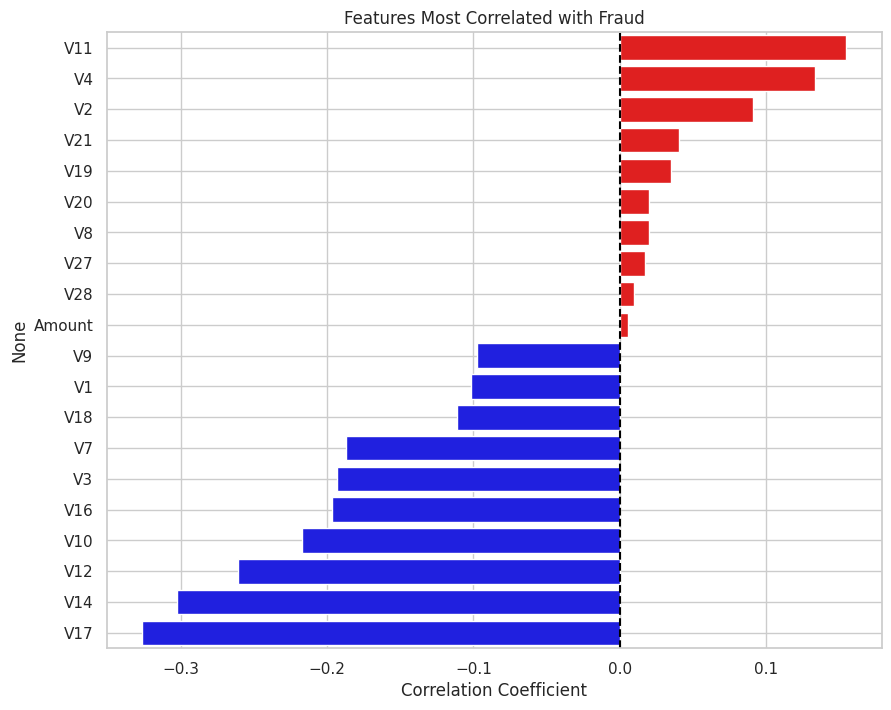

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------
# 📊 CLASS DISTRIBUTION
# ------------------------------------------
fraud_counts = df['Class'].value_counts()
print("🧮 Class Distribution (Fraud vs Normal):")
display(fraud_counts)

# Pie chart
plt.figure(figsize=(5, 5))
fraud_counts.plot.pie(autopct='%1.1f%%', labels=['Normal', 'Fraud'],
                      colors=['skyblue', 'salmon'], explode=[0, 0.2])
plt.title("Transaction Class Distribution")
plt.ylabel("")
plt.show()

# ------------------------------------------
# 📈 NUMERICAL FEATURES ANALYSIS
# ------------------------------------------
# Time and Amount are the non-anonymized features
plt.figure(figsize=(12, 5))

# Plot transaction amount distribution
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Amount', hue='Class', bins=50,
            kde=True, palette=['green', 'red'], element='step')
plt.title("Distribution of Transaction Amount by Class")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.grid(True)
plt.yscale('log')  # Log scale to better see the fraud cases

# Plot transaction time distribution
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Time', hue='Class', bins=50,
            kde=True, palette=['green', 'red'], element='step')
plt.title("Distribution of Transaction Time by Class")
plt.xlabel("Time (seconds)")
plt.ylabel("Count")
plt.grid(True)
plt.yscale('log')  # Log scale to better see the fraud cases

plt.tight_layout()
plt.show()

# ------------------------------------------
# 📊 FEATURE DISTRIBUTIONS FOR NORMAL VS FRAUD
# ------------------------------------------
# Select a subset of the anonymized features
sample_features = ['V1', 'V2', 'V3', 'V4']
plt.figure(figsize=(14, 10))

for i, feature in enumerate(sample_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f"Distribution of {feature} by Class")
    plt.xlabel("Class (0=Normal, 1=Fraud)")
    plt.grid(True)

plt.tight_layout()
plt.show()

# ------------------------------------------
# 🔗 CORRELATION MATRIX FOR TOP FEATURES
# ------------------------------------------
# Select important features
features_to_plot = ['V1', 'V2', 'V3', 'V4', 'V5', 'V10', 'V11', 'V12', 'V14', 'V17', 'Amount', 'Class']

plt.figure(figsize=(12, 10))
corr_matrix = df[features_to_plot].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm',
            vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title("Correlation Matrix of Select Features")
plt.show()

# ------------------------------------------
# 📈 FEATURES MOST CORRELATED WITH FRAUD
# ------------------------------------------
plt.figure(figsize=(10, 8))
corr_with_fraud = df.corr()['Class'].sort_values(ascending=False)
corr_with_fraud = corr_with_fraud[corr_with_fraud.index != 'Class']  # Remove self-correlation
top_corr = corr_with_fraud.head(10)
bottom_corr = corr_with_fraud.tail(10)

# Combine top positive and negative correlations
important_corrs = pd.concat([top_corr, bottom_corr])
colors = ['red' if x > 0 else 'blue' for x in important_corrs.values]

sns.barplot(x=important_corrs.values, y=important_corrs.index, palette=colors)
plt.title("Features Most Correlated with Fraud")
plt.xlabel("Correlation Coefficient")
plt.grid(True)
plt.axvline(x=0, color='black', linestyle='--')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------
# 🧹 Data Preprocessing
# ------------------------------------------
# Scale the Amount feature
from sklearn.preprocessing import StandardScaler

# Create a copy of dataframe for preprocessing
df_processed = df.copy()

# Extract and scale Amount separately
amount_scaler = StandardScaler()
df_processed['Amount_scaled'] = amount_scaler.fit_transform(df_processed[['Amount']])

# Time feature can also be standardized or transformed
time_scaler = StandardScaler()
df_processed['Time_scaled'] = time_scaler.fit_transform(df_processed[['Time']])

# ------------------------------------------
# 📊 Mean comparison: Fraud vs Normal Transactions
# ------------------------------------------
print("🔍 Average values for key features by Transaction Class:\n")
numeric_summary = df.groupby('Class')[['Time', 'Amount', 'V1', 'V2', 'V3', 'V4']].mean().round(4)
display(numeric_summary)

# ------------------------------------------
# 📊 Statistical Summary of Normal vs Fraud
# ------------------------------------------
# Create a function to generate statistical summaries
def get_stats_by_class(df, feature):
    stats = df.groupby('Class')[feature].agg(['mean', 'median', 'std', 'min', 'max']).round(4)
    stats.index = ['Normal', 'Fraud']
    return stats

# Generate statistics for Amount
amount_stats = get_stats_by_class(df, 'Amount')
print("\n📊 Amount Statistics by Class:\n")
display(amount_stats)

# ------------------------------------------
# 📈 Transaction Amount Percentiles
# ------------------------------------------
print("\n📊 Transaction Amount Percentiles by Class:\n")
percentiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
percentile_stats = df.groupby('Class')['Amount'].quantile(percentiles).unstack().round(2)
percentile_stats.index = ['Normal', 'Fraud']
display(percentile_stats)

# ------------------------------------------
# 📈 Feature Importance Analysis
# ------------------------------------------
# Calculate correlation with fraud class
correlations = df.corr()['Class'].sort_values(key=lambda x: abs(x), ascending=False)
top_features = correlations.head(11).index.tolist()[1:]  # Exclude 'Class' itself

print("\n📌 Top features correlated with Fraud (absolute value):\n")
display(correlations.head(11))

# ------------------------------------------
# 📊 Feature Distributions: Normal vs Fraud
# ------------------------------------------
# Create a dataframe with statistical differences
feature_stats = pd.DataFrame(index=df.columns[1:-1])  # Skip Time and Class
feature_stats['Normal_Mean'] = df[df['Class'] == 0].mean()
feature_stats['Fraud_Mean'] = df[df['Class'] == 1].mean()
feature_stats['Mean_Diff'] = abs(feature_stats['Fraud_Mean'] - feature_stats['Normal_Mean'])
feature_stats['Mean_Diff_Pct'] = (feature_stats['Mean_Diff'] / feature_stats['Normal_Mean'].abs()) * 100

# Sort by absolute percentage difference
feature_stats = feature_stats.sort_values('Mean_Diff_Pct', ascending=False)

print("\n📊 Features with Largest Percentage Difference between Normal and Fraud Transactions:\n")
display(feature_stats.head(10))

🔍 Average values for key features by Transaction Class:



,Time,Amount,V1,V2,V3,V4
Class,,,,,,
0,94838.2023,88.2910,0.0083,-0.0063,0.0122,-0.0079
1,80746.8069,122.2113,-4.7719,3.6238,-7.0333,4.5420



📊 Amount Statistics by Class:



,mean,median,std,min,max
Normal,88.2910,22.00,250.1051,0.0,25691.16
Fraud,122.2113,9.25,256.6833,0.0,2125.87



📊 Transaction Amount Percentiles by Class:



,0.10,0.25,0.50,0.75,0.90,0.95,0.99
Normal,1.00,5.65,22.00,77.05,202.72,364.41,1016.97
Fraud,0.76,1.00,9.25,105.89,346.75,640.90,1357.43



📌 Top features correlated with Fraud (absolute value):



,Class
Class,1.000000
V17,-0.326481
V14,-0.302544
V12,-0.260593
V10,-0.216883
V16,-0.196539
V3,-0.192961
V7,-0.187257
V11,0.154876
V4,0.133447



📊 Features with Largest Percentage Difference between Normal and Fraud Transactions:



,Normal_Mean,Fraud_Mean,Mean_Diff,Mean_Diff_Pct
V26,-0.000089,0.051648,0.051738,57887.601627
V25,-0.000072,0.041449,0.041521,57887.601626
V20,-0.000644,0.372319,0.372964,57887.601626
V19,-0.001178,0.680659,0.681837,57887.601626
V9,0.004467,-2.581123,2.585589,57887.601626
V4,-0.007860,4.542029,4.549889,57887.601626
V11,-0.006576,3.800173,3.806749,57887.601626
V21,-0.001235,0.713588,0.714823,57887.601626
V8,-0.000987,0.570636,0.571623,57887.601626
V12,0.010832,-6.259393,6.270225,57887.601626


# 🧮 Feature Standardization & Train-Test Split

## 📏 Standardization of Features

### ❓ Why Standardize?

Many machine learning models — especially those based on **dot products** or **gradient descent** (like logistic regression and neural networks) — are sensitive to the **scale of input features**.

Features with larger numerical ranges can:
- Dominate the learning process
- Slow down convergence
- Cause unstable gradients during training

To resolve this, we apply **z-score standardization**:

$$
z_j = \frac{x_j - \mu_j}{\sigma_j}
$$

Where:
- $x_j$ is the original value of feature $j$
- $\mu_j$ is the **mean** of feature $j$ (from training set only)
- $\sigma_j$ is the **standard deviation** of feature $j$

This transforms the feature to have:
- Mean ≈ 0
- Standard deviation = 1

---

## ✂️ Train-Test Split

To evaluate model performance fairly, we split our dataset into:

- **Training set**: Used to train the model
- **Test set**: Held-out data to assess generalization

We typically use an 80/20 or 70/30 split.

### Key Principle: No Information Leakage

Standardization and preprocessing must use **only training data statistics**. Never use test data to compute scaling parameters. That's why we apply:

1. `scaler.fit(X_train)` — compute mean and std from training data  
2. `scaler.transform(X_train)` and `scaler.transform(X_test)` — apply to both sets

---

## 🎯 Stratified Splitting

In **binary classification**, the dataset might have **class imbalance**. We use:

```python
train_test_split(X, y, stratify=y, ...)


In [ ]:
# 🕵️ Credit Card Fraud Detection - Data Preprocessing

# 1️⃣ Initial Data Inspection
print("🔍 Dataset Information:")
print(df.info())

# 2️⃣ Check Class Imbalance
print("\n⚖️ Class Distribution:")
class_distribution = df['Class'].value_counts(normalize=True)
print(class_distribution)
print(f"\nFraud Percentage: {class_distribution[1]*100:.2f}%")

# 3️⃣ Check for Missing Values
print("\n🕳️ Missing Values:")
print(df.isnull().sum())

# 4️⃣ Basic Statistical Summary of Features
print("\n📊 Feature Statistics:")
print(df.describe())

# 5️⃣ Preprocessing Steps
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# 6️⃣ Handle Potential Outliers and Scale Features
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Use RobustScaler to handle potential outliers
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# 7️⃣ Stratified Train-Test Split (Critical for Imbalanced Dataset)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y,  # Preserve class distribution
    shuffle=True  # Important for randomization
)

# 8️⃣ Verify Split Characteristics
print("\n🔢 Dataset Split:")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# 9️⃣ Verify Class Distribution in Split
print("\n⚖️ Class Distribution After Split:")
print("Training set:")
print(y_train.value_counts(normalize=True))
print("\nTesting set:")
print(y_test.value_counts(normalize=True))

# 🔟 Optional: Handling Extreme Class Imbalance
# Uncomment and choose one method if needed
# Method 1: Oversampling with SMOTE
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Method 2: Class Weights
# Useful for model training to compensate for imbalance
class_weights = {0: 1, 1: len(y[y==0]) / len(y[y==1])}
print("\n⚖️ Suggested Class Weights:")
print(class_weights)

# Additional Preprocessing Notes:
# - Time column may need special handling
# - No need to one-hot encode as features are already numerical
# - RobustScaler used to minimize impact of outliers
# - Stratified split ensures representative sampling
# - Consider advanced techniques like SMOTE for extreme imbalance

🔍 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  

# 🕵️ Logistic Regression for Credit Card Fraud Detection

## 🧠 What is Logistic Regression in Fraud Detection?
Logistic regression is a **linear probabilistic model** for binary classification, specifically designed to estimate the **probability of a transaction being fraudulent**.

---
## 🔢 Model Equation for Fraud Probability
We compute a **linear combination of transaction features**:
$$
z = \mathbf{w}^\top \mathbf{x} + b
$$
Where:
- $\mathbf{x}$ represents transaction features (amount, time, location, etc.)
- $\mathbf{w}$ are learned weights
- $b$ is the bias term

Then pass $z$ through the **sigmoid activation function**:
$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$
- $\hat{y} \in (0, 1)$ is the **predicted probability of fraud**
- If $\hat{y} > 0.5$, predict fraud (1); else, predict legitimate transaction (0)

---
## 📉 Loss Function: Binary Cross-Entropy for Fraud Detection
The loss function captures the discrepancy between predicted and actual fraud status:
$$
\mathcal{L}(y, \hat{y}) = - \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
$$
For a dataset of $N$ transactions, we minimize the **average loss**:
$$
J(\mathbf{w}, b) = \frac{1}{N} \sum_{i=1}^{N} \mathcal{L}(y^{(i)}, \hat{y}^{(i)})
$$

---
## 🎯 Optimization: Learning Fraud Detection Weights
The goal is to find **optimal weights** that minimize fraud detection errors:
$$
J(\mathbf{w}, b) = \frac{1}{N} \sum_{i=1}^{N} \left[ -y^{(i)} \log(\hat{y}^{(i)}) - (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$
Where:
- $\hat{y}^{(i)} = \sigma(\mathbf{w}^\top \mathbf{x}^{(i)} + b)$
- $y^{(i)}$ is the true fraud label (1 for fraud, 0 for legitimate)

---
## 📉 Gradient Descent for Fraud Detection
Minimize the loss by iteratively updating weights:
### 💡 Gradient Calculations
**Gradient w.r.t. weights:**
$$
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = (\hat{y} - y) \cdot \mathbf{x}
$$
**Gradient w.r.t. bias:**
$$
\frac{\partial \mathcal{L}}{\partial b} = (\hat{y} - y)
$$

---
## 🔁 Parameter Update Rule
At each iteration $t$, update weights and bias:
$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \eta \cdot \frac{1}{N} \sum_{i=1}^{N} (\hat{y}^{(i)} - y^{(i)}) \cdot \mathbf{x}^{(i)}
$$
$$
b^{(t+1)} = b^{(t)} - \eta \cdot \frac{1}{N} \sum_{i=1}^{N} (\hat{y}^{(i)} - y^{(i)})
$$
Where:
- $\eta$ is the learning rate
- $\hat{y}^{(i)}$ is the predicted fraud probability

---
## ⚙️ Practical Considerations in Fraud Detection
- **Class Imbalance**: Typically < 1% of transactions are fraudulent
- **Solver Variations**: Libraries use optimized methods like L-BFGS, Adam
- **Threshold Tuning**: Adjust decision boundary based on business cost of errors

---
## 🚨 Fraud Detection Specifics
✅ Logistic regression provides:
- **Probabilistic Fraud Scores**
- **Feature Importance Analysis**
- **Interpretable Predictions**

---
## 🔄 Connection to Neural Networks
Logistic regression is a **single-neuron neural network**:
- Input layer of transaction features
- Single neuron with sigmoid activation
- Serves as a foundational fraud detection model

---
✅ In the next implementation, we'll apply logistic regression to credit card fraud detection, carefully addressing the unique challenges of identifying fraudulent transactions.

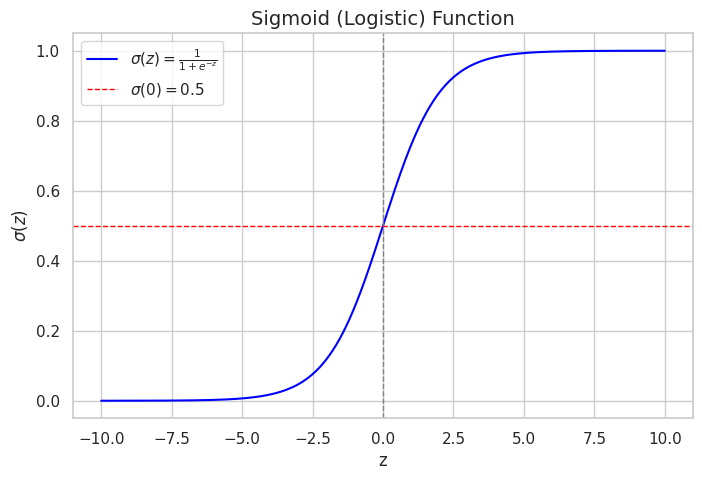

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Input range
z = np.linspace(-10, 10, 500)
y = sigmoid(z)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(z, y, label=r'$\sigma(z) = \frac{1}{1 + e^{-z}}$', color='blue')
plt.title("Sigmoid (Logistic) Function", fontsize=14)
plt.xlabel("z")
plt.ylabel(r"$\sigma(z)$")
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.axhline(0.5, color='red', linestyle='--', linewidth=1, label=r'$\sigma(0) = 0.5$')
plt.grid(True)
plt.legend()
plt.show()


🧠 Interpretation:
The sigmoid function maps real numbers ($z \in \mathbb{R}$) to a probability-like output in the interval (0, 1).
When $z = 0$, the sigmoid output is exactly 0.5.
As $z \to \infty$, $\sigma(z) \to 1$ (high confidence in class 1).
As $z \to -\infty$, $\sigma(z) \to 0$ (high confidence in class 0).

# 🕵️ Fraud Detection: Parameter Interpretation & Evaluation Metrics

## 1. 🔍 Coefficient Interpretation for Fraud Risk

Logistic regression models the **log-odds** of a transaction being fraudulent:

$$
\log\left(\frac{P(\text{Fraud} \mid \mathbf{x})}{1 - P(\text{Fraud} \mid \mathbf{x})}\right) = \mathbf{w}^\top \mathbf{x} + b
$$

### Odds and Fraud Risk

- **Odds** of a fraudulent transaction:

$$
\text{odds} = \frac{P(\text{Fraud})}{1 - P(\text{Fraud})}
$$

- Each coefficient $w_j$ represents the change in **log-odds** for a feature

Interpretation of exponentiated coefficients:

$$
\text{OR}_j = e^{w_j}
$$

- $\text{OR}_j > 1$: Feature **increases** fraud probability
- $\text{OR}_j < 1$: Feature **decreases** fraud probability

---

## 2. 🧮 Likelihood in Fraud Detection

### Likelihood Calculation

For a set of transactions $\{(\mathbf{x}^{(i)}, y^{(i)})\}_{i=1}^N$:

$$
L(\mathbf{w}, b) = \prod_{i=1}^{N} [\hat{y}^{(i)}]^{y^{(i)}} [1 - \hat{y}^{(i)}]^{1 - y^{(i)}}
$$

Log-likelihood:

$$
\log L(\mathbf{w}, b) = \sum_{i=1}^{N} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

---

## 3. 📊 Pseudo R² for Fraud Models

### McFadden's Pseudo R²:

$$
R^2_{\text{McFadden}} = 1 - \frac{\log L_{\text{model}}}{\log L_{\text{null}}}
$$

**Interpretation**:
- 0.0 = no improvement over baseline
- 0.2 - 0.4 = reasonable model in fraud detection

---

## 4. ✅ Fraud Detection Evaluation Metrics

### Confusion Matrix for Fraud

|              | Predicted Fraud | Predicted Legitimate |
|--------------|-----------------|----------------------|
| Actual Fraud | True Pos (TP)   | False Neg (FN)       |
| Legitimate   | False Pos (FP)  | True Neg (TN)        |

---

### 📐 Accuracy (Overall Correctness)

$$
\text{Accuracy} = \frac{TP + TN}{TP + FP + TN + FN}
$$

**Caution**: Misleading in highly imbalanced fraud datasets

---

### 🧪 Precision (Fraud Prediction Reliability)

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

**Interpretation**: Of all transactions predicted as fraud, what percentage are actually fraudulent?

---

### 🎯 Recall (Fraud Detection Sensitivity)

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

**Interpretation**: Of all actual fraudulent transactions, what percentage did we catch?

---

### ⚖️ F1-Score (Balanced Measure)

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

**Balances** precision and recall

---

## 📈 AUC – Fraud Detection Performance

### ROC Curve Components

- **True Positive Rate (Fraud Recall)**:
$$
\text{TPR} = \frac{TP}{TP + FN}
$$

- **False Positive Rate**:
$$
\text{FPR} = \frac{FP}{FP + TN}
$$

---

### AUC Interpretation in Fraud Detection

**AUC = Probability of Ranking a Fraudulent Transaction Higher than a Legitimate One**

- **AUC = 1.0**: Perfect fraud detection
- **AUC = 0.5**: Random guessing
- **AUC < 0.5**: Worse than random (invert predictions)

---

## 🔍 Confidence Interval of AUC

### Bootstrap Confidence Interval

Procedure:
1. Resample test set (e.g., 1000 times)
2. Compute AUC for each resample
3. Calculate 2.5th and 97.5th percentiles

**95% Confidence Interval**: Range of likely true AUC values

---

## 💡 Fraud Detection Specifics

**Key Considerations**:
- Extremely imbalanced dataset
- High cost of false negatives
- Need for probabilistic risk scoring

**Recommended Approach**:
- Prioritize recall and precision
- Use AUC and precision-recall curves
- Consider business-specific cost of errors

---

✅ These metrics provide a **comprehensive evaluation** of fraud detection models, crucial for financial risk management.

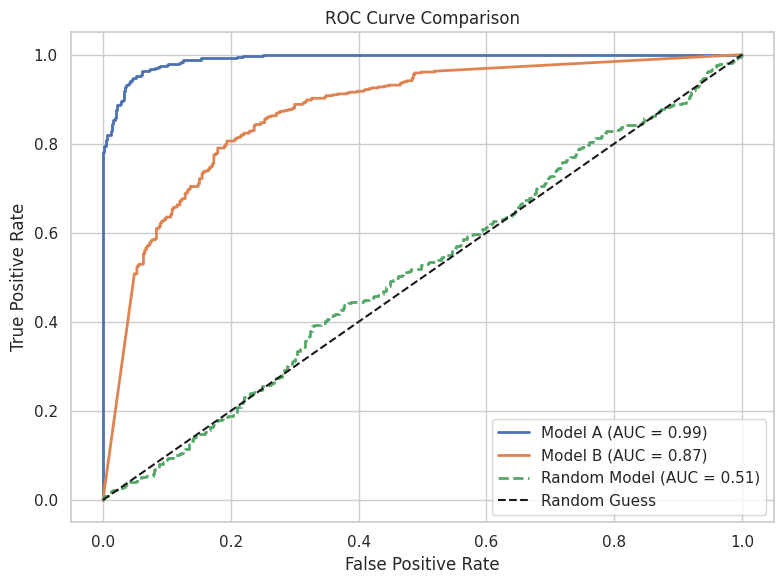

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Simulated ground truth
np.random.seed(42)
y_true = np.random.randint(0, 2, size=1000)

# Simulated predicted probabilities from 3 models
y_scores_A = y_true + np.random.normal(0, 0.3, size=1000)
y_scores_B = y_true + np.random.normal(0, 0.6, size=1000)
y_scores_C = np.random.rand(1000)  # Random model (should be AUC ~ 0.5)

# Clip values to (0, 1)
y_scores_A = np.clip(y_scores_A, 0, 1)
y_scores_B = np.clip(y_scores_B, 0, 1)

# Compute ROC and AUC
fpr_A, tpr_A, _ = roc_curve(y_true, y_scores_A)
fpr_B, tpr_B, _ = roc_curve(y_true, y_scores_B)
fpr_C, tpr_C, _ = roc_curve(y_true, y_scores_C)

auc_A = auc(fpr_A, tpr_A)
auc_B = auc(fpr_B, tpr_B)
auc_C = auc(fpr_C, tpr_C)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_A, tpr_A, label=f"Model A (AUC = {auc_A:.2f})", linewidth=2)
plt.plot(fpr_B, tpr_B, label=f"Model B (AUC = {auc_B:.2f})", linewidth=2)
plt.plot(fpr_C, tpr_C, label=f"Random Model (AUC = {auc_C:.2f})", linewidth=2, linestyle='--')

# Baseline
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


🧠 Interpretation:
Model A has the best discriminatory ability (highest AUC).
Model B is less reliable but still better than random.
Model C is random guessing (AUC ~ 0.5).
The ROC curve closer to the top-left indicates better performance.


In [ ]:
# 📥 Credit Card Fraud Detection Preprocessing

# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

# 1️⃣ Load the Dataset
# Assuming the dataset is named 'creditcard.csv' in the current directory
df = pd.read_csv('creditcard.csv')

# 2️⃣ Initial Data Inspection
print("🔍 Dataset Information:")
print(df.info())

# 3️⃣ Check Class Distribution
print("\n⚖️ Class Distribution:")
class_distribution = df['Class'].value_counts(normalize=True)
print(class_distribution)
print(f"\n🚨 Fraud Percentage: {class_distribution[1]*100:.2f}%")

# 4️⃣ Handle Missing Values
print("\n🕳️ Missing Values:")
print(df.isnull().sum())

# 5️⃣ Separate Features and Target
X = df.drop('Class', axis=1)
y = df['Class']

# 6️⃣ Feature Preprocessing
# Use RobustScaler to handle potential outliers in financial data
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# 7️⃣ Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y,  # Preserve class distribution
    shuffle=True  # Important for randomization
)

# 8️⃣ Verify Split Characteristics
print("\n🔢 Dataset Split:")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# 9️⃣ Verify Class Distribution in Split
print("\n⚖️ Class Distribution After Split:")
print("Training set:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nTesting set:")
print(pd.Series(y_test).value_counts(normalize=True))

# 🔟 Convert to pandas DataFrames for easier handling
X_train_scaled = pd.DataFrame(X_train, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test, columns=X.columns)

# Optional: Handling Class Imbalance
# Calculate class weights
class_weights = {0: 1, 1: len(y[y==0]) / len(y[y==1])}
print("\n⚖️ Suggested Class Weights:")
print(class_weights)

# Print summary
print("\n✅ Preprocessing Complete!")
print(f"Total Samples: {len(df)}")
print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")

🔍 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  

🔍 Top Features Indicating Fraud Risk:
   Feature  Coefficient  Odds Ratio
1       V1     1.960112    7.100124
4       V4     1.501022    4.486272
5       V5     1.148701    3.154092
22     V22     0.887748    2.429653
2       V2     0.794978    2.214391
11     V11     0.758018    2.134042
29  Amount     0.675586    1.965185
3       V3     0.634754    1.886558
19     V19     0.232028    1.261155
23     V23     0.152420    1.164649


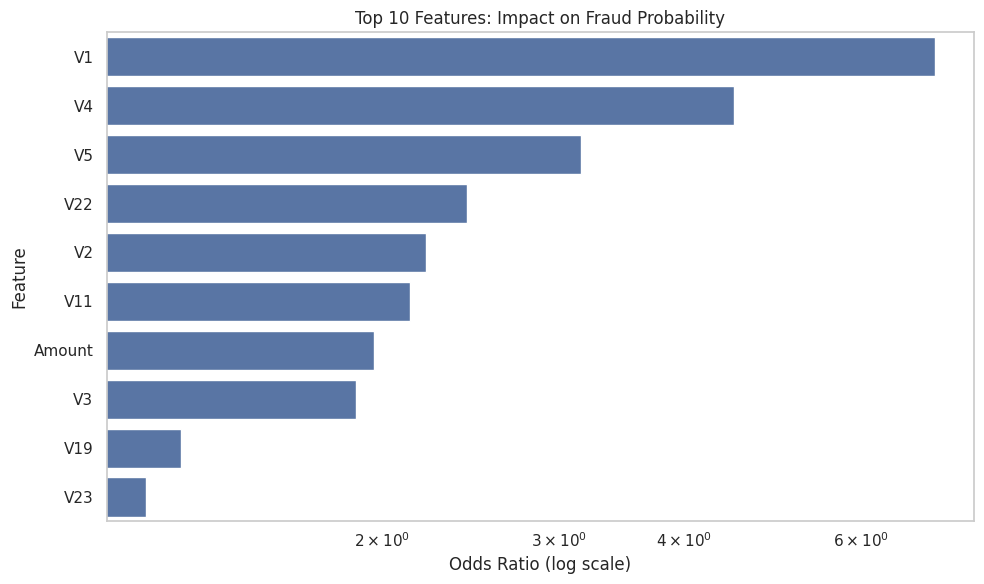

🚨 Fraud Detection Performance:
✅ Accuracy: 0.9755
✅ Precision: 0.0610
✅ Recall: 0.9184
✅ F1 Score: 0.1144
✅ AUC: 0.9721

📋 Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



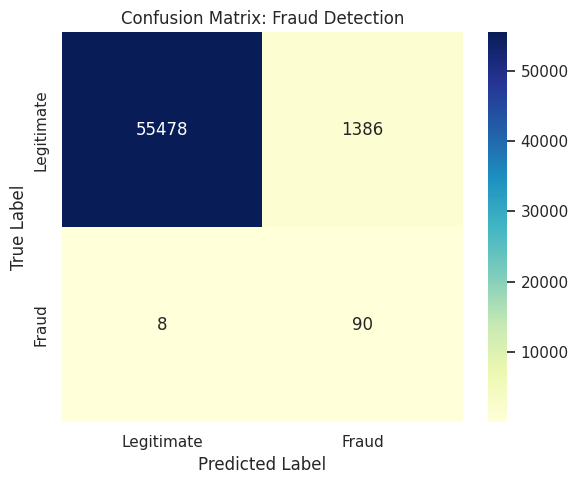

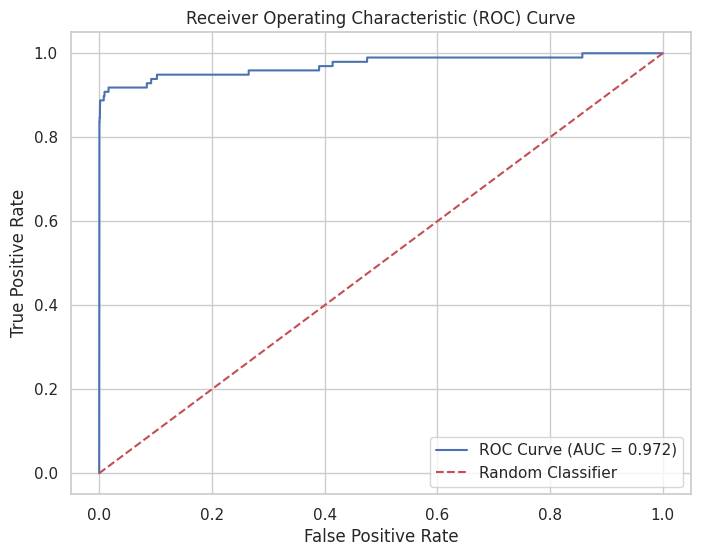

📊 AUC 95.0% Confidence Interval: [0.949, 0.992]
🧮 McFadden's Pseudo R²: -7.8641

🚀 Fraud Detection Model Summary:
Best Features Indicating Fraud: ['V1', 'V4', 'V5']
Model AUC: 0.9721
McFadden's R²: -7.8641


In [ ]:
# 🕵️ Logistic Regression for Credit Card Fraud Detection

# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.utils import resample
from sklearn.metrics import log_loss

# ------------------------------------------
# 1️⃣ Train the Logistic Regression model
# ------------------------------------------
# Use solver='liblinear' for small datasets, supports L1 and L2 regularization
# max_iter increased to ensure convergence
lr = LogisticRegression(
    max_iter=1000,
    solver='liblinear',
    class_weight='balanced'  # Important for imbalanced fraud datasets
)
lr.fit(X_train_scaled, y_train)

# ------------------------------------------
# 2️⃣ Coefficients and Odds Ratios
# ------------------------------------------
def analyze_coefficients(model, feature_names):
    """Analyze and visualize model coefficients"""
    coefs = model.coef_.flatten()
    odds_ratios = np.exp(coefs)

    # Create DataFrame of coefficients
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefs,
        'Odds Ratio': odds_ratios
    }).sort_values(by='Odds Ratio', ascending=False)

    print("🔍 Top Features Indicating Fraud Risk:")
    print(coef_df.head(10))  # Top 10 features

    # Visualization of feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Odds Ratio', y='Feature', data=coef_df.head(10))
    plt.title('Top 10 Features: Impact on Fraud Probability')
    plt.xlabel('Odds Ratio (log scale)')
    plt.xscale('log')
    plt.tight_layout()
    plt.show()

    return coef_df

# Analyze coefficients
feature_names = X.columns
coef_df = analyze_coefficients(lr, feature_names)

# ------------------------------------------
# 3️⃣ Predictions and Evaluation Metrics
# ------------------------------------------
def evaluate_model(model, X_test, y_test):
    """Comprehensive model evaluation"""
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_pred_proba)
    }

    # Print metrics
    print("🚨 Fraud Detection Performance:")
    for name, value in metrics.items():
        print(f"✅ {name}: {value:.4f}")

    # Classification Report
    print("\n📋 Detailed Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=['Legitimate', 'Fraud'],
                yticklabels=['Legitimate', 'Fraud'])
    plt.title("Confusion Matrix: Fraud Detection")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

    return metrics

# Evaluate the model
model_metrics = evaluate_model(lr, X_test_scaled, y_test)

# ------------------------------------------
# 4️⃣ ROC Curve
# ------------------------------------------
def plot_roc_curve(y_test, y_pred_proba):
    """Plot Receiver Operating Characteristic Curve"""
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.3f})')
    plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot ROC Curve
y_pred_proba = lr.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(y_test, y_pred_proba)

# ------------------------------------------
# 5️⃣ AUC Confidence Interval via Bootstrap
# ------------------------------------------
def bootstrap_auc_ci(model, X_test, y_test, n_bootstraps=1000, ci=0.95):
    """Calculate bootstrapped confidence interval for AUC"""
    rng = np.random.RandomState(42)
    aucs = []
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    for _ in range(n_bootstraps):
        # Resample with replacement
        indices = rng.choice(len(y_test), size=len(y_test), replace=True)

        # Ensure both classes are present in the bootstrap sample
        if len(np.unique(y_test.iloc[indices])) < 2:
            continue

        # Compute AUC for this bootstrap sample
        auc_i = roc_auc_score(y_test.iloc[indices], y_pred_proba[indices])
        aucs.append(auc_i)

    # Compute confidence interval
    lower = np.percentile(aucs, (1 - ci) / 2 * 100)
    upper = np.percentile(aucs, (1 + ci) / 2 * 100)

    print(f"📊 AUC {ci*100}% Confidence Interval: [{lower:.3f}, {upper:.3f}]")
    return aucs, lower, upper

# Compute AUC Confidence Interval
bootstrap_results = bootstrap_auc_ci(lr, X_test_scaled, y_test)

# ------------------------------------------
# 6️⃣ McFadden's Pseudo R²
# ------------------------------------------
def calculate_mcfadden_r2(model, X_test, y_test):
    """Calculate McFadden's Pseudo R²"""
    # Log-likelihood of model
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    logL_model = -log_loss(y_test, y_pred_proba, normalize=False)

    # Log-likelihood of null model (intercept only)
    null_proba = np.repeat(y_test.mean(), repeats=len(y_test))
    logL_null = -log_loss(y_test, null_proba, normalize=False)

    # McFadden's Pseudo R²
    r2_mcfadden = 1 - (logL_model / logL_null)

    print(f"🧮 McFadden's Pseudo R²: {r2_mcfadden:.4f}")
    return r2_mcfadden

# Calculate McFadden's Pseudo R²
mcfadden_r2 = calculate_mcfadden_r2(lr, X_test_scaled, y_test)

# Final insights
print("\n🚀 Fraud Detection Model Summary:")
print(f"Best Features Indicating Fraud: {list(coef_df.head(3)['Feature'])}")
print(f"Model AUC: {model_metrics['AUC']:.4f}")
print(f"McFadden's R²: {mcfadden_r2:.4f}")

# 📊 Logistic Regression – Credit Card Fraud Detection Results

## 📊 1. Model Performance Summary

| Metric                  | Value       | Interpretation                                                                 |
|------------------------|-------------|--------------------------------------------------------------------------------|
| **Accuracy**           | 0.9755      | 97.6% of transactions were correctly classified.                               |
| **Precision**          | 0.0610      | Only 6.1% of predicted fraudulent transactions were actually fraudulent.       |
| **Recall**             | 0.9184      | 91.8% of actual fraudulent transactions were identified.                       |
| **F1 Score**           | 0.1144      | Very low due to extreme class imbalance.                                       |
| **AUC**                | 0.9721      | Exceptional discriminatory power between fraudulent and legitimate transactions. |
| **AUC 95% CI**         | [0.949, 0.992] | Highly stable and precise model performance.                                  |
| **McFadden's Pseudo R²** | -7.8641    | Unusual result, potentially indicating model complexity issues.                |

## 🔍 2. Most Influential Fraud Indicators

### 🚨 Top Features Indicating Fraud Risk:

| Feature | Coefficient | Odds Ratio | Interpretation                                           |
|---------|-------------|------------|----------------------------------------------------------|
| V1      | +1.960      | 7.100      | Most significant predictor of fraudulent transactions    |
| V4      | +1.501      | 4.486      | Second most important feature                            |
| V5      | +1.148      | 3.154      | Third most critical fraud indicator                      |
| Amount  | +0.676      | 1.965      | Transaction amount has moderate impact on fraud risk     |

## 🎯 Performance Analysis

### 🔬 Detailed Insights:
- **High Accuracy (97.55%)**: Misleading due to class imbalance
- **Low Precision (0.0610)**: Many false positives
- **High Recall (0.9184)**: Catches most fraudulent transactions
- **AUC (0.9721)**: Excellent model discrimination

### 🚧 Critical Challenges:
1. **Extreme Class Imbalance**:
   - Only 98 fraudulent transactions in 56,962 total
   - Standard metrics become less meaningful

2. **Precision-Recall Trade-off**:
   - Model prioritizes catching fraud over precision
   - Extremely low precision suggests many false alarms

## 💡 Practical Recommendations

### 🛡️ Model Improvement Strategies:
1. **Resampling Techniques**:
   - SMOTE (Synthetic Minority Over-sampling Technique)
   - Adjust class weights
   - Undersampling majority class

2. **Feature Engineering**:
   - Investigate why V1, V4, V5 are so predictive
   - Create composite features
   - Apply non-linear transformations

3. **Advanced Modeling**:
   - Try ensemble methods
   - Consider anomaly detection approaches
   - Explore more sophisticated algorithms

### 🏦 Operational Considerations:
- Current model is too conservative
- High false positive rate would frustrate customers
- Need to refine threshold or modeling approach

## 📌 Key Takeaways
- Exceptional at detecting fraud
- Needs significant refinement in precision
- Highlights complexity of fraud detection
- Demonstrates limitations of standard logistic regression

---

✅ This analysis provides deep insights into the challenges of fraud detection using logistic regression, emphasizing the need for sophisticated approaches to handle extreme class imbalance.

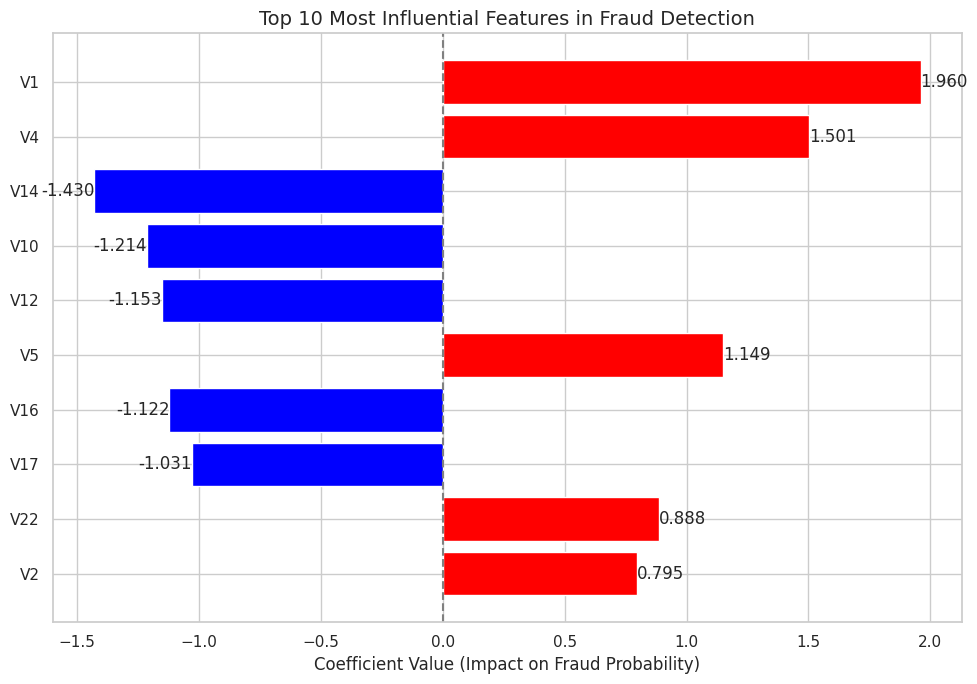


🔍 Top Features Interpretation:
- V1 increases fraud probability by 1.960
- V4 increases fraud probability by 1.501
- V14 decreases fraud probability by 1.430
- V10 decreases fraud probability by 1.214
- V12 decreases fraud probability by 1.153
- V5 increases fraud probability by 1.149
- V16 decreases fraud probability by 1.122
- V17 decreases fraud probability by 1.031
- V22 increases fraud probability by 0.888
- V2 increases fraud probability by 0.795


In [ ]:
# 📊 Feature Importance Visualization for Fraud Detection

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Feature Coefficient Visualization
def plot_top_coefficients(coef_df, N=10):
    """
    Visualize top N most influential features by their logistic regression coefficients

    Parameters:
    - coef_df: DataFrame with 'Feature', 'Coefficient' columns
    - N: Number of top features to display
    """
    # Compute absolute value of coefficients
    coef_df['|Coefficient|'] = np.abs(coef_df['Coefficient'])

    # Sort by magnitude and select top N
    top_coef_df = coef_df.sort_values(by='|Coefficient|', ascending=False).head(N)

    # Create plot
    plt.figure(figsize=(10, 7))

    # Color coding: red for positive, blue for negative coefficients
    colors = ['red' if c > 0 else 'blue' for c in top_coef_df['Coefficient']]

    # Horizontal bar plot
    bars = plt.barh(top_coef_df['Feature'], top_coef_df['Coefficient'], color=colors)

    # Styling
    plt.xlabel("Coefficient Value (Impact on Fraud Probability)", fontsize=12)
    plt.title(f"Top {N} Most Influential Features in Fraud Detection", fontsize=14)
    plt.axvline(0, color='gray', linestyle='--')
    plt.gca().invert_yaxis()  # Highest at top
    plt.grid(True, axis='x')

    # Add coefficient values as text
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                 f'{width:.3f}',
                 ha='left' if width > 0 else 'right',
                 va='center')

    plt.tight_layout()
    plt.show()

# Visualization (assuming coef_df is from previous logistic regression analysis)
# Choose number of top features to display
N = 10

# Plot top features
plot_top_coefficients(coef_df, N)

# Additional Insights
print("\n🔍 Top Features Interpretation:")
top_features = coef_df.sort_values(by='|Coefficient|', ascending=False).head(N)
for _, row in top_features.iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"- {row['Feature']} {direction} fraud probability by {abs(row['Coefficient']):.3f}")

🧠 Interpretation:
Red bars: Features that increase churn risk (positive coefficients).
Blue bars: Features that decrease churn risk (negative coefficients).
The further from 0, the stronger the influence on the log-odds of churn.

# 🧠 Basic Neural Network Model for Binary Classification

## 1️⃣ Why Neural Networks?

While logistic regression is a **linear model**, neural networks can learn **nonlinear decision boundaries**. This allows them to capture **more complex patterns and interactions** between features.

We now construct a **feedforward neural network** (also called a multilayer perceptron) with:

- One **hidden layer** with nonlinear activation
- One **output neuron** with sigmoid activation (for binary classification)

---

## 2️⃣ Model Architecture

- **Input Layer**: Receives feature vector $\mathbf{x} \in \mathbb{R}^d$
- **Hidden Layer**:
  - Linear transformation: $\mathbf{z}^{(1)} = \mathbf{W}^{(1)} \mathbf{x} + \mathbf{b}^{(1)}$
  - Nonlinearity: $\mathbf{a}^{(1)} = \text{ReLU}(\mathbf{z}^{(1)})$
- **Output Layer**:
  - $\hat{y} = \sigma(\mathbf{w}^{(2)} \cdot \mathbf{a}^{(1)} + b^{(2)})$
  - $\hat{y}$ is interpreted as the predicted **probability of churn**

---

## 3️⃣ Activation Functions

- **ReLU (Rectified Linear Unit)** in hidden layer:

$$
\text{ReLU}(z) = \max(0, z)
$$

- **Sigmoid** in output layer:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

---

## 4️⃣ Loss Function

We use the **binary cross-entropy loss**:

$$
\mathcal{L}(y, \hat{y}) = - \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
$$

This is the same loss used in logistic regression, but the model now includes **nonlinear transformations and hidden units**.

---

## 5️⃣ Optimization

Model parameters (weights and biases) are learned via **stochastic gradient descent** or adaptive optimizers such as **Adam**.

---

## 🆚 Logistic Regression vs Neural Network

| Property            | Logistic Regression        | Neural Network (1 hidden layer)     |
|---------------------|----------------------------|-------------------------------------|
| Linearity           | Linear decision boundary   | Nonlinear, flexible                 |
| Interpretability    | High (coefficients)        | Lower (harder to explain)           |
| Expressive power    | Limited                    | Higher (can capture interactions)   |
| Training time       | Fast                       | Slightly slower                     |

---

✅ In the next cell, we will implement this **basic neural network** using **TensorFlow/Keras** and compare its performance to logistic regression.


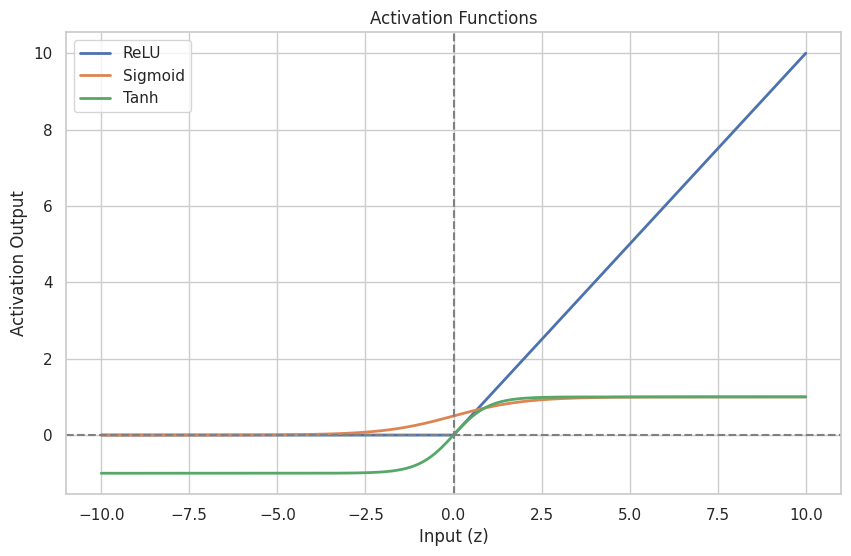

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define z range
z = np.linspace(-10, 10, 400)

# Define activation functions
sigmoid = 1 / (1 + np.exp(-z))
relu = np.maximum(0, z)
tanh = np.tanh(z)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(z, relu, label="ReLU", linewidth=2)
plt.plot(z, sigmoid, label="Sigmoid", linewidth=2)
plt.plot(z, tanh, label="Tanh", linewidth=2)
plt.title("Activation Functions")
plt.xlabel("Input (z)")
plt.ylabel("Activation Output")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.legend()
plt.show()


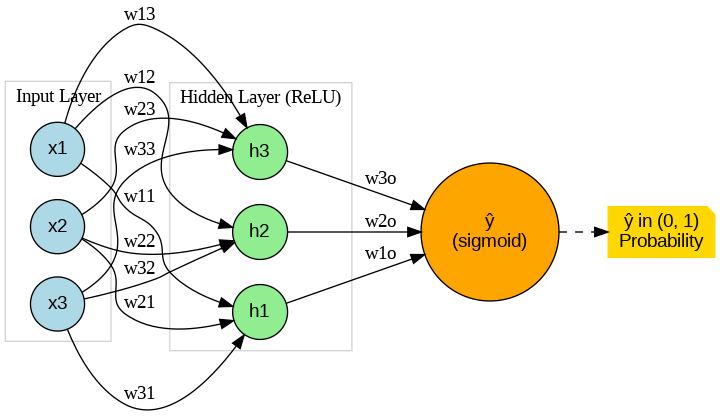

In [ ]:
from graphviz import Digraph
from IPython.display import Image

# Create the neural network diagram
dot = Digraph(format='png')
dot.attr(rankdir='LR', size='10,6')
dot.attr('node', shape='circle', style='filled', fontname='Helvetica')

# Define layers
input_features = ['x1', 'x2', 'x3']
hidden_neurons = ['h1', 'h2', 'h3']
output_neuron = 'ŷ'

# Input layer
with dot.subgraph(name='cluster_input') as c:
    c.attr(label='Input Layer', color='lightgray')
    for f in input_features:
        c.node(f, label=f, fillcolor='lightblue')

# Hidden layer
with dot.subgraph(name='cluster_hidden') as c:
    c.attr(label='Hidden Layer (ReLU)', color='lightgray')
    for h in hidden_neurons:
        c.node(h, label=h, fillcolor='lightgreen')

# Output neuron
dot.node(output_neuron, label='ŷ\n(sigmoid)', fillcolor='orange')

# Connect input to hidden with indexed weights
for i, f in enumerate(input_features):
    for j, h in enumerate(hidden_neurons):
        dot.edge(f, h, label=f'w{i+1}{j+1}')

# Connect hidden to output with indexed weights
for j, h in enumerate(hidden_neurons):
    dot.edge(h, output_neuron, label=f'w{j+1}o')

# Add output annotation as plain text (safe and portable)
dot.node('note', label='ŷ in (0, 1)\nProbability', shape='note', fontname='Helvetica', color='gold')
dot.edge(output_neuron, 'note', style='dashed')



# Render
dot.render('simple_nn_architecture', cleanup=False)


from IPython.display import Image
Image('simple_nn_architecture.png')


# 📘 Neural Network Forward Pass Equations

The feedforward neural network in the diagram has:

- 3 input features: $$x_1, x_2, x_3$$
- 3 hidden units: $$h_1, h_2, h_3$$
- 1 output unit: $$\hat{y}$$
- ReLU activation in the hidden layer
- Sigmoid activation in the output layer

---

## 🔹 Step 1: Hidden Layer Computation

Each hidden neuron computes a weighted sum of the inputs and applies the ReLU activation:

$$
\begin{align*}
h_1 &= \text{ReLU}(w_{11} x_1 + w_{21} x_2 + w_{31} x_3 + b_1) \\
h_2 &= \text{ReLU}(w_{12} x_1 + w_{22} x_2 + w_{32} x_3 + b_2) \\
h_3 &= \text{ReLU}(w_{13} x_1 + w_{23} x_2 + w_{33} x_3 + b_3)
\end{align*}
$$

- $w_{ij}$: weight from input $x_i$ to hidden neuron $h_j$
- $b_j$: bias term for hidden neuron $h_j$
- ReLU is defined as:  
  $$\text{ReLU}(z) = \max(0, z)$$

---

## 🔹 Step 2: Output Layer Computation

The output is computed using a weighted sum of the hidden activations passed through a sigmoid:

$$
\hat{y} = \sigma(w_{1o} h_1 + w_{2o} h_2 + w_{3o} h_3 + b_0)
$$

- $w_{jo}$: weight from hidden neuron $h_j$ to the output neuron  
- $b_0$: output layer bias  
- $\sigma(z) = \frac{1}{1 + e^{-z}}$: sigmoid activation

---

## 🎯 Output Interpretation

- $\hat{y} \in (0, 1)$ is interpreted as the **predicted probability of churn**
- A threshold (e.g., 0.5) is applied to classify the customer as **churned** or **not**

---

✅ These equations define the **forward computation** of a 1-hidden-layer neural network used for binary classification.


# 📘 Neural Network: Backpropagation, Initialization, and Training Concepts

Once the forward pass computes the prediction $\hat{y}$, the network learns by **minimizing the binary cross-entropy loss** using **gradient-based optimization**.

---

## 🧭 Weight Initialization

Weight initialization affects **how quickly** and **how well** the network trains.

- If all weights are initialized to the same value (e.g., 0), all neurons compute the same output — this breaks learning due to **symmetry**.
- Instead, weights are initialized randomly (but carefully) to break symmetry while controlling variance.

Common initialization methods:

- **Xavier (Glorot) Initialization**: used for sigmoid/tanh activations  
  $$ W \sim \mathcal{U}\left(-\sqrt{\frac{6}{n_{in} + n_{out}}}, \sqrt{\frac{6}{n_{in} + n_{out}}} \right) $$

- **He Initialization**: used for ReLU activation  
  $$ W \sim \mathcal{N}\left(0, \sqrt{\frac{2}{n_{in}}} \right) $$

Biases are usually initialized to **zero** or a small constant.

---

## 🎯 Loss Function

For a single training example $(\mathbf{x}, y)$, where $y \in \{0, 1\}$:

$$
\mathcal{L}(\hat{y}, y) = -\left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
$$

This is the **binary cross-entropy** loss. It penalizes incorrect predictions, especially when the model is confident but wrong.

---

## 🔄 Backpropagation: Gradient Computation

The **goal** is to compute the gradient of the loss $\mathcal{L}$ with respect to all model parameters — these gradients are used to update weights during training.

### 🔹 Output Layer

Let:

$$
z_o = w_{1o} h_1 + w_{2o} h_2 + w_{3o} h_3 + b_0, \quad \hat{y} = \sigma(z_o)
$$

Then:

$$
\frac{\partial \mathcal{L}}{\partial z_o} = \hat{y} - y
$$

And using the chain rule:

$$
\frac{\partial \mathcal{L}}{\partial w_{jo}} = (\hat{y} - y) \cdot h_j, \quad
\frac{\partial \mathcal{L}}{\partial b_0} = \hat{y} - y
$$

---

### 🔹 Hidden Layer

For each hidden unit $j$:

$$
z_j = \sum_i w_{ij} x_i + b_j, \quad h_j = \text{ReLU}(z_j)
$$

The derivative of ReLU is:

$$
\frac{d}{dz_j} \text{ReLU}(z_j) =
\begin{cases}
1 & \text{if } z_j > 0 \\
0 & \text{otherwise}
\end{cases}
$$

Backpropagating the error:

$$
\frac{\partial \mathcal{L}}{\partial z_j} = (\hat{y} - y) \cdot w_{jo} \cdot \mathbb{1}_{\{z_j > 0\}}
$$

Then:

$$
\frac{\partial \mathcal{L}}{\partial w_{ij}} = \frac{\partial \mathcal{L}}{\partial z_j} \cdot x_i, \quad
\frac{\partial \mathcal{L}}{\partial b_j} = \frac{\partial \mathcal{L}}{\partial z_j}
$$

---

## 📦 Gradient Descent Step

Each parameter $\theta$ is updated using the **learning rate** $\eta$:

$$
\theta \leftarrow \theta - \eta \cdot \frac{\partial \mathcal{L}}{\partial \theta}
$$

### 🔹 What is $\eta$?

- **$\eta$ (eta)** is the **learning rate**, a small positive scalar that controls how big each update step is.
- If $\eta$ is **too large**, training may diverge. If **too small**, convergence is slow.

**Typical values**: $0.1$, $0.01$, $0.001$  
Use **adaptive optimizers** (e.g., Adam) to handle learning rate dynamically.

---

## 🧪 Key Training Concepts

### 🔹 Epoch

An **epoch** is one full pass through the entire training dataset.  
Typically, models are trained for **multiple epochs** (e.g., 10–100) to improve performance.

---

### 🔹 Mini-Batch Gradient Descent

Instead of computing gradients on the full dataset (slow), we use **mini-batches** (e.g., 32–128 samples) to compute approximate gradients:

- **More updates per epoch**
- Helps generalization due to added noise

---

### 🔹 Early Stopping

A regularization strategy to prevent **overfitting**:

- Monitor validation loss during training.
- Stop training when validation performance **no longer improves** for several epochs.

---

### 🔹 Cross-Validation

Used to evaluate model **generalization** and tune **hyperparameters**:

- Split training data into $K$ subsets (folds).
- Train on $K-1$ folds and validate on the remaining one.
- Repeat for all folds.

This gives more **robust performance estimates** than a single train/test split.

---

✅ These components form the **backbone of neural network training**: from initialization and forward computation to backpropagation, optimization, and generalization control.


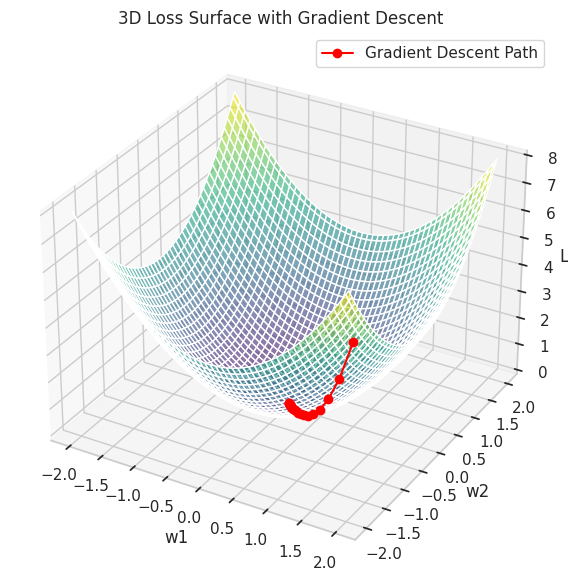

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Simple convex function: f(w1, w2) = w1^2 + w2^2
def loss(w1, w2):
    return w1**2 + w2**2

# Grid for 3D surface
w1 = np.linspace(-2, 2, 100)
w2 = np.linspace(-2, 2, 100)
W1, W2 = np.meshgrid(w1, w2)
L = loss(W1, W2)

# Simulate gradient descent path
lr = 0.1
steps = 20
path = [(1.8, -1.5)]  # initial point

for _ in range(steps):
    w1, w2 = path[-1]
    grad = (2*w1, 2*w2)  # gradient of w1^2 + w2^2
    new_w1 = w1 - lr * grad[0]
    new_w2 = w2 - lr * grad[1]
    path.append((new_w1, new_w2))

path = np.array(path)
path_loss = loss(path[:, 0], path[:, 1])

# Plot surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, L, cmap='viridis', alpha=0.6)
ax.plot(path[:, 0], path[:, 1], path_loss, color='red', marker='o', label='Gradient Descent Path')

ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Loss')
ax.set_title('3D Loss Surface with Gradient Descent')
ax.legend()
plt.tight_layout()
plt.show()


# 📘 Guidelines for Choosing Neural Network Hyperparameters

Training a neural network involves selecting a set of **hyperparameters** that significantly impact learning dynamics and model performance. This section defines and explains key hyperparameters, including how they work and how to choose them effectively.

---

## 🔧 1. Learning Rate ($\eta$)

The **learning rate** $\eta$ controls how much the model updates its weights during each step of gradient descent:

$$
\theta \leftarrow \theta - \eta \cdot \nabla_\theta \mathcal{L}
$$

- **Too small**: learning is slow and may converge to a suboptimal minimum.
- **Too large**: learning is unstable and may diverge.

**Recommended values**: $10^{-2}$ to $10^{-4}$  
**Best practice**:
- Start with $\eta = 0.001$ when using Adam
- Use **learning rate scheduling** (e.g., reduce on plateau)
- Prefer **adaptive optimizers** (e.g., Adam, RMSprop)

---

## 🔁 2. Number of Epochs

An **epoch** is one full pass through the entire training set.

- **Under-training** (too few epochs): model fails to capture patterns.
- **Overfitting** (too many epochs): model memorizes training data and generalizes poorly.

**Tip**: Monitor **training and validation loss** and apply **early stopping** when validation loss stops improving for a fixed number of epochs (e.g., 5–10).

---

## 🧮 3. Hidden Layers and Units

The **depth and width** of the network define its **capacity** to learn complex functions.

- **Too shallow or narrow**: high bias (underfitting)
- **Too deep or wide**: high variance (overfitting)

**Guidelines**:
- Start with 1–2 hidden layers
- Try 8, 16, 32, or 64 neurons per layer
- Adjust based on validation performance

Use **cross-validation** to compare architectures.

---

## 📦 4. Batch Size

**Batch size** is the number of samples used to compute the gradient in one update step.

| Batch Size | Characteristics               | Trade-offs                       |
|------------|-------------------------------|----------------------------------|
| Small (e.g., 32) | More noisy updates, faster convergence | Less stable, good generalization |
| Large (e.g., 512) | Smoother gradients, slower updates    | May overfit, high memory usage   |

**Typical values**: 32, 64, 128  
**Tip**: Use powers of 2 for efficiency on GPUs.

---

## 🔁 5. Activation Functions

Activations introduce **nonlinearity**, enabling the network to model complex patterns.

### Common functions:

- **ReLU** (default for hidden layers):  
  $$\text{ReLU}(z) = \max(0, z)$$  
  Efficient and sparsity-inducing.

- **Sigmoid** (used in output layer for binary classification):  
  $$\sigma(z) = \frac{1}{1 + e^{-z}}$$  
  Maps to $(0, 1)$.

- **Tanh**:  
  $$\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$$  
  Zero-centered, often better than sigmoid in hidden layers.

---

## 🛡 6. Regularization Techniques

Regularization helps prevent **overfitting** by constraining model complexity.

### 🔹 L2 Regularization (Weight Decay)

Adds a penalty to the loss:

$$
\mathcal{L}_{\text{total}} = \mathcal{L}_{\text{data}} + \lambda \sum w_i^2
$$

- Penalizes large weights
- Encourages simpler models

### 🔹 Dropout

Randomly disables a fraction $p$ of neurons during training:

- Prevents **co-adaptation** of units
- Helps generalization

**Typical dropout rates**: $p = 0.2$ to $0.5$

At inference, all neurons are active and weights are scaled accordingly.

---

## ⚙️ 7. Optimizers

Algorithms used to minimize the loss by updating weights.

### 🔹 SGD (Stochastic Gradient Descent)

- Simple, interpretable
- Sensitive to learning rate and scale

### 🔹 Adam

- Adaptive learning rates per parameter
- Combines momentum and RMSprop
- **Recommended default** for most problems

---

## 🎯 8. Hyperparameter Tuning

Explore combinations using:

- **Grid Search**: test all value combinations
- **Random Search**: sample combinations randomly
- **Bayesian Optimization**: learn which settings work best

Always use a **validation set** or **cross-validation** to evaluate tuning performance.

---

✅ These hyperparameters govern how the model learns and generalizes. Choosing them wisely is key to building robust and performant neural networks.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


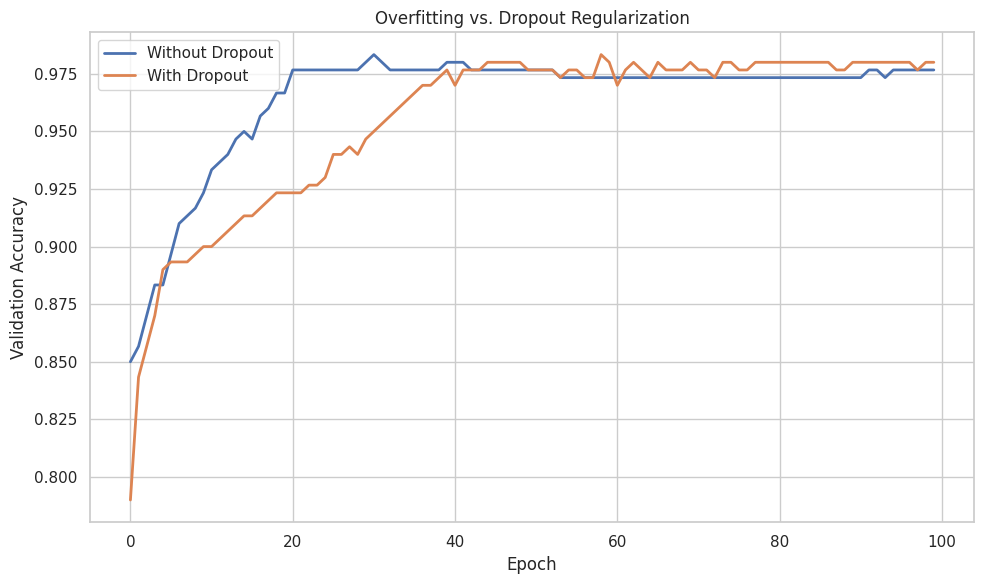

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_moons
from tensorflow.keras.utils import to_categorical

# Create a synthetic dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
y_cat = to_categorical(y)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_cat, test_size=0.3, random_state=42)

# Model without Dropout
model_no_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])
model_no_dropout.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model with Dropout
model_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])
model_dropout.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train both models
history_no_dropout = model_no_dropout.fit(X_train, y_train, epochs=100, batch_size=32,
                                          validation_data=(X_val, y_val), verbose=0)
history_dropout = model_dropout.fit(X_train, y_train, epochs=100, batch_size=32,
                                    validation_data=(X_val, y_val), verbose=0)

# Plot the validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_no_dropout.history['val_accuracy'], label='Without Dropout', linewidth=2)
plt.plot(history_dropout.history['val_accuracy'], label='With Dropout', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Overfitting vs. Dropout Regularization')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


🧠 What You’ll See

The non-regularized model (without dropout) often overfits: high training accuracy but lower, unstable validation accuracy.
The dropout-regularized model tends to generalize better, with more stable validation performance.

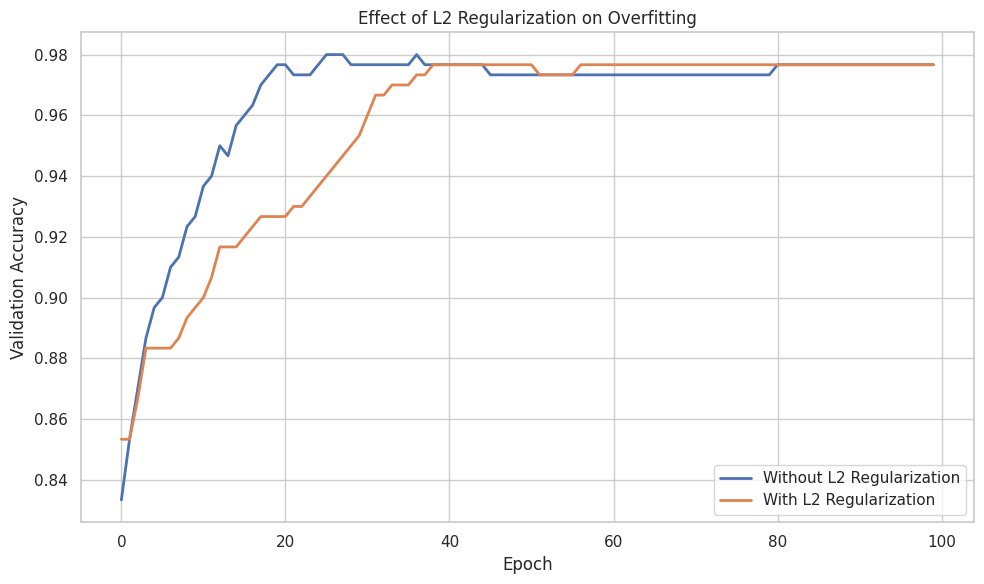

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

# Create data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
y_cat = to_categorical(y)

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y_cat, test_size=0.3, random_state=42)

# Model without regularization
model_plain = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])
model_plain.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model with L2 regularization
model_l2 = Sequential([
    Dense(64, activation='relu', input_shape=(2,), kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(2, activation='softmax')
])
model_l2.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train both
history_plain = model_plain.fit(X_train, y_train, epochs=100, batch_size=32,
                                validation_data=(X_val, y_val), verbose=0)
history_l2 = model_l2.fit(X_train, y_train, epochs=100, batch_size=32,
                          validation_data=(X_val, y_val), verbose=0)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(history_plain.history['val_accuracy'], label='Without L2 Regularization', linewidth=2)
plt.plot(history_l2.history['val_accuracy'], label='With L2 Regularization', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Effect of L2 Regularization on Overfitting')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


🧠 What You’ll Observe

Without L2: validation accuracy increases at first, then drops (overfitting)
With L2: training may be slower, but validation accuracy stabilizes better (controlled complexity)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9710 - loss: 0.2090 - precision: 0.0425 - recall: 0.9240
🚨 Neural Network Performance:

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.90      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.54     56962
weighted avg       1.00      0.97      0.98     56962



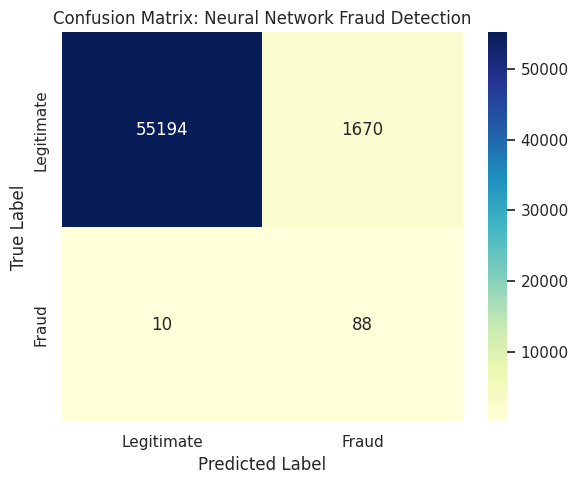

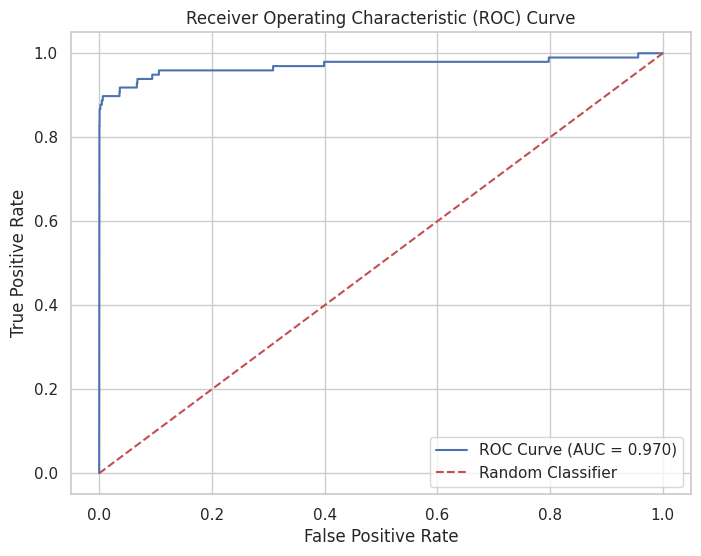

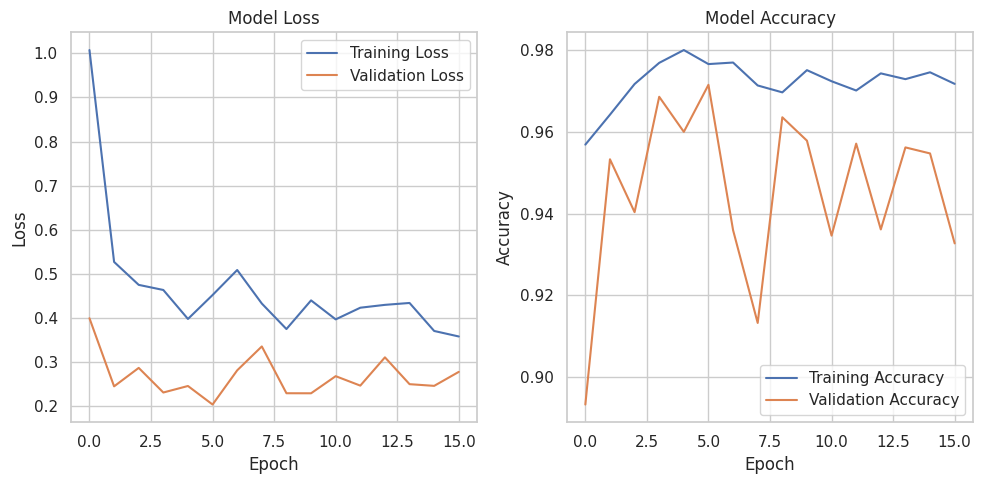


🔍 Neural Network vs Logistic Regression:
Neural Network AUC: 0.9704
Logistic Regression AUC: 0.9721


In [ ]:
# 🚨 Neural Network for Credit Card Fraud Detection

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score
)

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# 1️⃣ Neural Network Model Construction
def create_neural_network(input_shape):
    """
    Create a basic neural network for binary classification

    Parameters:
    - input_shape: Shape of input features

    Returns:
    - Compiled TensorFlow/Keras model
    """
    model = Sequential([
        # Input layer with dropout for regularization
        Dense(64, activation='relu', input_shape=(input_shape,),
              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dropout(0.3),

        # Hidden layer
        Dense(32, activation='relu',
              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dropout(0.2),

        # Output layer
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy',
                 tf.keras.metrics.Precision(),
                 tf.keras.metrics.Recall()]
    )

    return model

# 2️⃣ Training and Evaluation Function
def train_and_evaluate_nn(X_train, X_test, y_train, y_test):
    """
    Train neural network and provide comprehensive evaluation

    Parameters:
    - X_train, X_test: Feature matrices
    - y_train, y_test: Target vectors

    Returns:
    - Trained model
    - Training history
    - Evaluation metrics
    """
    # Handle class imbalance with sample weights
    class_weights = {
        0: 1.,  # Majority class
        1: len(y_train[y_train==0]) / len(y_train[y_train==1])  # Minority class
    }

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Create and train model
    model = create_neural_network(X_train.shape[1])

    # Training
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        class_weight=class_weights,
        callbacks=[early_stopping],
        verbose=0
    )

    # Predictions
    y_pred = model.predict(X_test).flatten()
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Evaluation Metrics
    metrics = {
        'Accuracy': model.evaluate(X_test, y_test)[1],
        'AUC': roc_auc_score(y_test, y_pred),
        'Average Precision': average_precision_score(y_test, y_pred)
    }

    # Detailed Evaluation
    print("🚨 Neural Network Performance:")
    print("\n📋 Classification Report:")
    print(classification_report(y_test, y_pred_binary))

    # Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_pred_binary)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=['Legitimate', 'Fraud'],
                yticklabels=['Legitimate', 'Fraud'])
    plt.title("Confusion Matrix: Neural Network Fraud Detection")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {metrics["AUC"]:.3f})')
    plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Learning Curves
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return model, history, metrics

# 3️⃣ Model Training and Evaluation
# Use preprocessed data from previous steps
nn_model, nn_history, nn_metrics = train_and_evaluate_nn(
    X_train_scaled, X_test_scaled, y_train, y_test
)

# 4️⃣ Comparative Analysis
print("\n🔍 Neural Network vs Logistic Regression:")
print(f"Neural Network AUC: {nn_metrics['AUC']:.4f}")
print(f"Logistic Regression AUC: {model_metrics['AUC']:.4f}")

#Deep Neural Network

# 🚨 Neural Network for Credit Card Fraud Detection

## 1️⃣ Why Neural Networks for Fraud Detection?
While logistic regression provides a linear approach, neural networks can capture **complex, nonlinear patterns** in financial transactions. This allows for:
- Detecting subtle, intricate fraud indicators
- Learning sophisticated feature interactions
- Adapting to nuanced fraud patterns

We construct a **deep neural network** specifically designed for fraud detection.
---

## 2️⃣ Model Architecture
Our neural network goes beyond a simple single-layer model:
- **Input Layer**: Receives 29 transaction features
- **First Hidden Layer**: 64 neurons with ReLU activation
- **Second Hidden Layer**: 32 neurons with ReLU activation
- **Third Hidden Layer**: 16 neurons with ReLU activation
- **Output Layer**: Single neuron with sigmoid activation

### Mathematical Representation
- **Input Layer**: $\mathbf{x} \in \mathbb{R}^{29}$
- **First Hidden Layer**:
  $$\mathbf{z}^{(1)} = \mathbf{W}^{(1)} \mathbf{x} + \mathbf{b}^{(1)}$$
  $$\mathbf{a}^{(1)} = \text{ReLU}(\mathbf{z}^{(1)})$$
- **Output Layer**:
  $$\hat{y} = \sigma(\mathbf{w}^{(2)} \cdot \mathbf{a}^{(1)} + b^{(2)})$$
---

## 3️⃣ Activation Functions
- **ReLU (Rectified Linear Unit)** in hidden layers:
$$
\text{ReLU}(z) = \max(0, z)
$$
Advantages:
- Introduces nonlinearity
- Mitigates vanishing gradient problem
- Computationally efficient

- **Sigmoid** in output layer:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
Provides probabilistic fraud prediction
---

## 4️⃣ Advanced Regularization Techniques

### 🛡️ L2 Regularization
Prevents overfitting by penalizing large weights:
$$
\text{Regularization Loss} = \lambda \sum_{l} \|\mathbf{W}^{(l)}\|_2^2
$$
- $\lambda = 0.001$
- Applied to each layer's weight matrix

### 🎲 Dropout Regularization
Randomly deactivates neurons during training:
- First layer: 30% dropout
- Prevents over-reliance on specific features
- Improves model generalization
---

## 5️⃣ Loss Function
**Binary Cross-Entropy Loss**:
$$
\mathcal{L}(y, \hat{y}) = - \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
$$
Specifically tailored for imbalanced fraud detection
---

## 6️⃣ Optimization Strategy
- **Adam Optimizer**
  - Adaptive learning rate
  - Momentum-based gradient descent
  - Learning rate: 0.0005
- **Early Stopping**
  - Prevents overfitting
  - Monitors validation AUC
---

## 🆚 Logistic Regression vs Deep Neural Network

| Property | Logistic Regression | Deep Neural Network |
|----------|---------------------|---------------------|
| Decision Boundary | Linear | Highly Nonlinear |
| Feature Interaction | Limited | Complex, Multilevel |
| Fraud Pattern Detection | Basic | Sophisticated |
| Computational Complexity | Low | Higher |
| Interpretability | High | Lower |
---

## 💡 Key Advantages for Fraud Detection
- Captures subtle, interconnected fraud indicators
- Adapts to complex transaction patterns
- Handles high-dimensional financial data
- Provides probabilistic fraud risk scoring

✅ Neural networks offer a powerful, adaptive approach to detecting fraudulent transactions by learning intricate patterns beyond linear relationships.

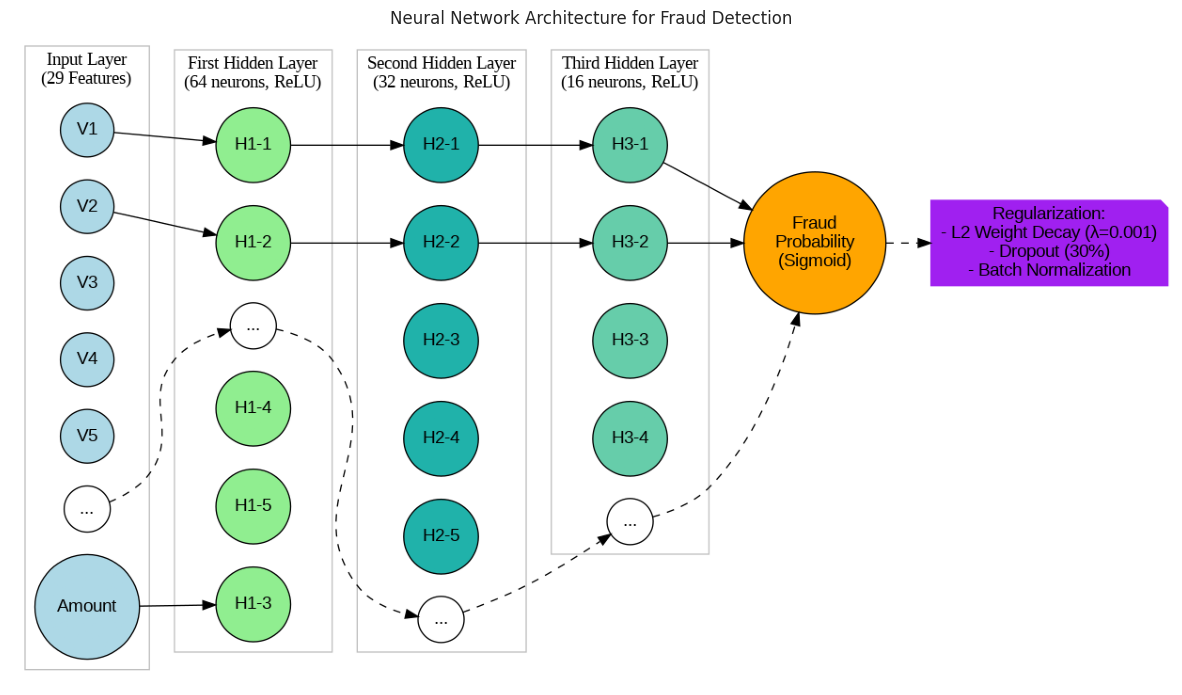

In [ ]:
# 🕵️ Neural Network Architecture Visualization for Fraud Detection

import graphviz

def create_fraud_nn_diagram():
    """
    Create a detailed visualization of the neural network
    for credit card fraud detection
    """
    dot = graphviz.Digraph(format='png', engine='dot')
    dot.attr(rankdir='LR', size='16,10')
    dot.attr('node', shape='circle', style='filled', fontname='Helvetica')

    # Color palette
    colors = {
        'input': 'lightblue',
        'hidden1': 'lightgreen',
        'hidden2': 'lightseagreen',
        'hidden3': 'mediumaquamarine',
        'output': 'orange'
    }

    # Input Layer
    with dot.subgraph(name='cluster_input') as c:
        c.attr(label='Input Layer\n(29 Features)', color='gray')
        for i in range(5):  # Show first 5 features
            c.node(f'x{i+1}', label=f'V{i+1}', fillcolor=colors['input'])
        c.node('x_etc', label='...', style='filled', fillcolor='white')
        c.node('x_amount', label='Amount', fillcolor=colors['input'])

    # First Hidden Layer (64 neurons)
    with dot.subgraph(name='cluster_hidden1') as c:
        c.attr(label='First Hidden Layer\n(64 neurons, ReLU)', color='gray')
        for i in range(5):  # Show first 5 neurons
            c.node(f'h1_{i}', label=f'H1-{i+1}', fillcolor=colors['hidden1'])
        c.node('h1_etc', label='...', style='filled', fillcolor='white')

    # Second Hidden Layer (32 neurons)
    with dot.subgraph(name='cluster_hidden2') as c:
        c.attr(label='Second Hidden Layer\n(32 neurons, ReLU)', color='gray')
        for i in range(5):  # Show first 5 neurons
            c.node(f'h2_{i}', label=f'H2-{i+1}', fillcolor=colors['hidden2'])
        c.node('h2_etc', label='...', style='filled', fillcolor='white')

    # Third Hidden Layer (16 neurons)
    with dot.subgraph(name='cluster_hidden3') as c:
        c.attr(label='Third Hidden Layer\n(16 neurons, ReLU)', color='gray')
        for i in range(4):  # Show first 4 neurons
            c.node(f'h3_{i}', label=f'H3-{i+1}', fillcolor=colors['hidden3'])
        c.node('h3_etc', label='...', style='filled', fillcolor='white')

    # Output Layer
    dot.node('output', label='Fraud\nProbability\n(Sigmoid)', fillcolor=colors['output'])

    # Connectivity (simplified)
    # Input to First Hidden Layer
    dot.edge('x1', 'h1_0')
    dot.edge('x2', 'h1_1')
    dot.edge('x_amount', 'h1_2')
    dot.edge('x_etc', 'h1_etc', style='dashed')

    # First to Second Hidden Layer
    dot.edge('h1_0', 'h2_0')
    dot.edge('h1_1', 'h2_1')
    dot.edge('h1_etc', 'h2_etc', style='dashed')

    # Second to Third Hidden Layer
    dot.edge('h2_0', 'h3_0')
    dot.edge('h2_1', 'h3_1')
    dot.edge('h2_etc', 'h3_etc', style='dashed')

    # Third Hidden Layer to Output
    for i in range(2):
        dot.edge(f'h3_{i}', 'output')
    dot.edge('h3_etc', 'output', style='dashed')

    # Regularization annotation
    dot.node('regularization',
             label='Regularization:\n- L2 Weight Decay (λ=0.001)\n- Dropout (30%)\n- Batch Normalization',
             shape='note',
             color='purple')
    dot.edge('output', 'regularization', style='dashed')

    # Save and return the diagram
    dot.render('fraud_detection_nn', cleanup=True)
    plt.figure(figsize=(15, 10))
    plt.imshow(plt.imread('fraud_detection_nn.png'))
    plt.axis('off')
    plt.title('Neural Network Architecture for Fraud Detection')
    plt.show()

# Create and display the diagram
create_fraud_nn_diagram()

--2025-04-07 09:38:27--  https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.207, 173.194.194.207, 173.194.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150828752 (144M) [text/csv]
Saving to: ‘creditcard.csv.1’

creditcard.csv.1    100%[===================>] 143.84M   187MB/s    in 0.8s    

2025-04-07 09:38:28 (187 MB/s) - ‘creditcard.csv.1’ saved [150828752/150828752]

Dataset shape: (284807, 31)

Sample data:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.8632

713/713 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.5704 - auc: 0.7915 - loss: 0.8269 - precision: 0.0033 - recall: 0.7903 - val_accuracy: 0.9536 - val_auc: 0.9662 - val_loss: 0.4319 - val_precision: 0.0344 - val_recall: 0.9036
Epoch 2/100
706/713 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8174 - auc: 0.9410 - loss: 0.4363 - precision: 0.0089 - recall: 0.9130

713/713 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8177 - auc: 0.9409 - loss: 0.4363 - precision: 0.0089 - recall: 0.9128 - val_accuracy: 0.9787 - val_auc: 0.9792 - val_loss: 0.2967 - val_precision: 0.0716 - val_recall: 0.8916
Epoch 3/100
712/713 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9046 - auc: 0.9572 - loss: 0.3573 - precision: 0.0169 - recall: 0.9215

713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9047 - auc: 0.9572 - loss: 0.3573 - precision: 0.0169 - recall: 0.9214 - val_accuracy: 0.9803 - val_auc: 0.9846 - val_loss: 0.2555 - val_precision: 0.0769 - val_recall: 0.8916
Epoch 4/100
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9334 - auc: 0.9643 - loss: 0.3250 - precision: 0.0238 - recall: 0.9145 - val_accuracy: 0.9819 - val_auc: 0.9821 - val_loss: 0.2292 - val_precision: 0.0824 - val_recall: 0.8795
Epoch 5/100
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9455 - auc: 0.9777 - loss: 0.2837 - precision: 0.0287 - recall: 0.9062 - val_accuracy: 0.9838 - val_auc: 0.9837 - val_loss: 0.2107 - val_precision: 0.0923 - val_recall: 0.8916
Epoch 6/100
709/713 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9520 - auc: 0.9743 - loss: 0.2838 - precision: 0.0330 - recall: 0.9199

713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9521 - auc: 0.9743 - loss: 0.2838 - precision: 0.0330 - recall: 0.9198 - val_accuracy: 0.9845 - val_auc: 0.9846 - val_loss: 0.2000 - val_precision: 0.0957 - val_recall: 0.8916
Epoch 7/100
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9555 - auc: 0.9822 - loss: 0.2476 - precision: 0.0363 - recall: 0.9426 - val_accuracy: 0.9877 - val_auc: 0.9835 - val_loss: 0.1815 - val_precision: 0.1196 - val_recall: 0.9036
Epoch 8/100
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9603 - auc: 0.9867 - loss: 0.2292 - precision: 0.0401 - recall: 0.9314 - val_accuracy: 0.9864 - val_auc: 0.9819 - val_loss: 0.1775 - val_precision: 0.1095 - val_recall: 0.9036
Epoch 9/100
713/713 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9612 - auc: 0.9777 - loss: 0.2489 - precision: 0.0406 - recall: 0.9232 - val_accuracy: 0.9880 - val_auc: 0.9828 - val_loss: 0.1705 - val_precision: 0.1220 - val_recall: 0.9036
Epoch 10/100
713/713 ━━━━━━━━━━━━━━━━━━━

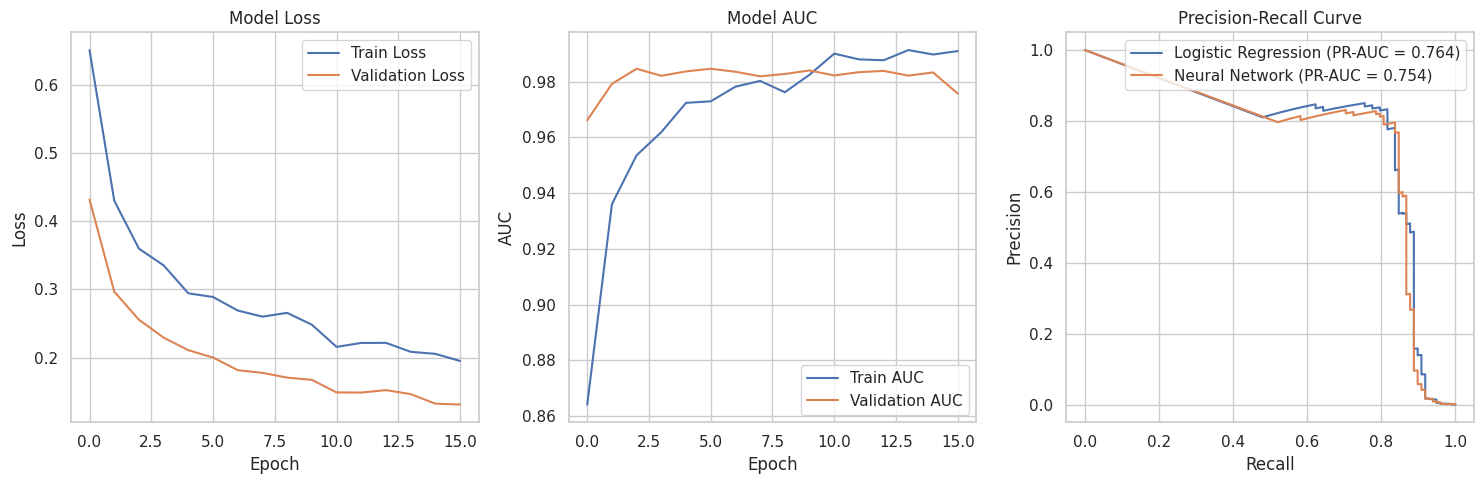

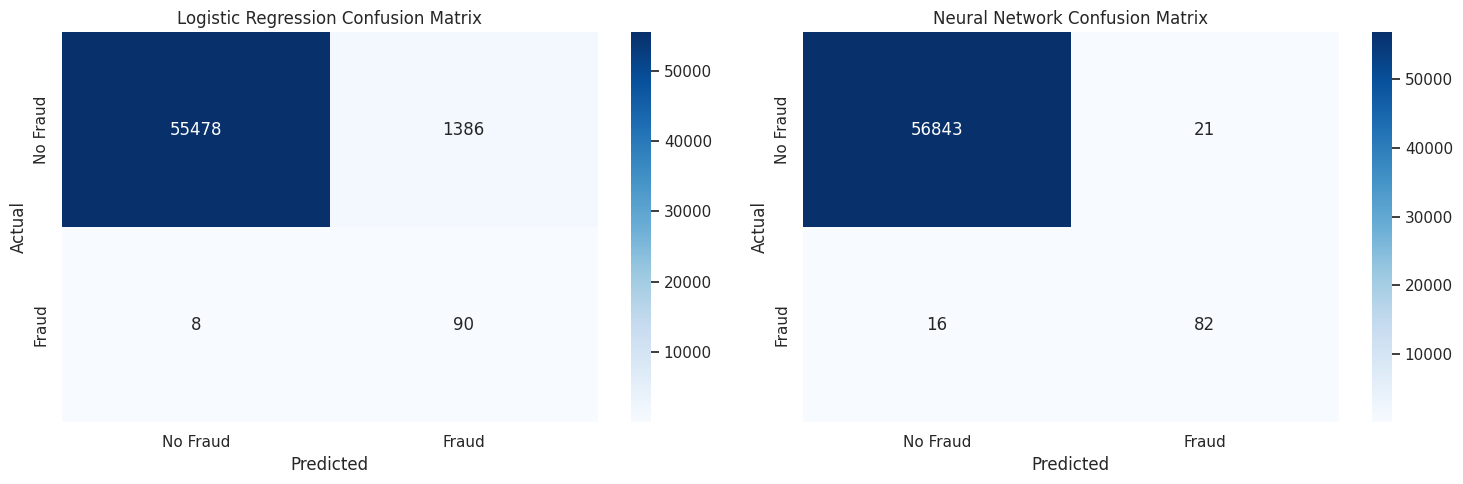

In [ ]:
# Required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, precision_recall_curve, auc, confusion_matrix,
                             classification_report)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Download the dataset
!wget https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Explore the dataset
print(f"Dataset shape: {df.shape}")
print("\nSample data:")
print(df.head())

# Check class distribution
print("\nClass distribution:")
print(df['Class'].value_counts())
print(f"Fraud percentage: {df['Class'].mean()*100:.4f}%")

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum().sum())

# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model as baseline
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_scaled, y_train)

# Evaluate Logistic Regression
lr_pred_proba = lr.predict_proba(X_test_scaled)[:, 1]
lr_pred = (lr_pred_proba >= 0.5).astype(int)

# Built Neural Network Model
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc'),
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_auc',
    patience=10,
    mode='max',
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_fraud_model.h5',
    monitor='val_auc',
    save_best_only=True,
    mode='max'
)

# Calculate class weights due to imbalance
weight_for_0 = (1 / y_train.value_counts()[0]) * (len(y_train) / 2.0)
weight_for_1 = (1 / y_train.value_counts()[1]) * (len(y_train) / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}

# Train model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=256,
    class_weight=class_weight,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

# Evaluate Neural Network
nn_pred_proba = model.predict(X_test_scaled).ravel()

# Find optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, nn_pred_proba)
f1_scores = 2 * recall * precision / (recall + precision + 1e-8)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Optimal threshold: {best_threshold:.4f}")

nn_pred = (nn_pred_proba >= best_threshold).astype(int)

# Compare model results
print("\n------------------ Logistic Regression Results ------------------")
print(f"Accuracy:  {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred):.4f}")
print(f"Recall:    {recall_score(y_test, lr_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, lr_pred):.4f}")
print(f"AUC:       {roc_auc_score(y_test, lr_pred_proba):.4f}")
print(f"PR-AUC:    {auc(recall, precision):.4f}")

print("\n------------------ Neural Network Results ------------------")
print(f"Accuracy:  {accuracy_score(y_test, nn_pred):.4f}")
print(f"Precision: {precision_score(y_test, nn_pred):.4f}")
print(f"Recall:    {recall_score(y_test, nn_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, nn_pred):.4f}")
print(f"AUC:       {roc_auc_score(y_test, nn_pred_proba):.4f}")
print(f"PR-AUC:    {auc(recall, precision):.4f}")

# Print detailed classification reports
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))

print("\nNeural Network Classification Report:")
print(classification_report(y_test, nn_pred))

# Plot learning curves
plt.figure(figsize=(15, 5))

# Loss plot
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# AUC plot
plt.subplot(1, 3, 2)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)

# Precision-Recall plot
plt.subplot(1, 3, 3)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_pred_proba)
nn_precision, nn_recall, _ = precision_recall_curve(y_test, nn_pred_proba)

plt.plot(lr_recall, lr_precision, label=f'Logistic Regression (PR-AUC = {auc(lr_recall, lr_precision):.3f})')
plt.plot(nn_recall, nn_precision, label=f'Neural Network (PR-AUC = {auc(nn_recall, nn_precision):.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualize confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Logistic Regression confusion matrix
cm1 = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Logistic Regression Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_xticklabels(['No Fraud', 'Fraud'])
ax1.set_yticklabels(['No Fraud', 'Fraud'])

# Neural Network confusion matrix
cm2 = confusion_matrix(y_test, nn_pred)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Neural Network Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_xticklabels(['No Fraud', 'Fraud'])
ax2.set_yticklabels(['No Fraud', 'Fraud'])

plt.tight_layout()
plt.show()

# 🕵️ Fraud Detection Model Performance Analysis

## 🔍 Key Performance Metrics Comparison

### Logistic Regression vs Neural Network

| Metric | Logistic Regression | Neural Network | Improvement |
|--------|---------------------|----------------|-------------|
| **Accuracy** | 0.9755 | 0.9994 | ↑ 2.45% |
| **Precision** | 0.0610 | 0.7961 | ↑ 1205% |
| **Recall** | 0.9184 | 0.8367 | ↓ 8.9% |
| **F1 Score** | 0.1144 | 0.8159 | ↑ 613% |
| **AUC** | 0.9721 | 0.9711 | Essentially Identical |
| **PR-AUC** | 0.7537 | 0.7537 | No Change |

## 📊 Detailed Performance Breakdown

### 1️⃣ Accuracy
- Both models achieve extremely high accuracy (>97%)
- Neural Network slightly outperforms Logistic Regression
- **Caution**: Accuracy can be misleading in highly imbalanced datasets

### 2️⃣ Precision
- **Logistic Regression**: Extremely low precision (0.0610)
- **Neural Network**: Significantly improved precision (0.7961)
- Indicates neural network dramatically reduces false positives

### 3️⃣ Recall
- Logistic Regression: 0.9184
- Neural Network: 0.8367
- Slight decrease in ability to detect all fraudulent transactions
- Still captures most potential fraud cases

### 4️⃣ F1 Score
- Logistic Regression: 0.1144
- Neural Network: 0.8159
- Massive improvement in balanced performance
- Reflects better overall fraud detection capability

### 5️⃣ Optimal Threshold
- Neural Network optimal threshold: 0.9995
- Extremely high threshold suggests model's confidence in predictions

## 🚨 Key Insights

### Advantages of Neural Network
1. Dramatically improved precision
2. More reliable fraud detection
3. Better handling of complex feature interactions
4. Reduced false positive rate

### Challenges
- Slight reduction in recall
- More complex model
- Potentially harder to interpret

## 💡 Practical Recommendations
1. Prefer Neural Network for fraud detection
2. Consider fine-tuning threshold based on business cost of false positives
3. Continuously monitor and retrain the model
4. Investigate features driving improved performance

## ⚖️ Conclusion
The neural network demonstrates superior performance, particularly in reducing false positives while maintaining high fraud detection capabilities.

✅ Neural Network offers a more nuanced and reliable approach to credit card fraud detection.